In [12]:
%cd
import os
import uproot4 as uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import mplhep as hep
import pandas as pd
import awkward as ak
import logging
from scipy.stats import norm
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.offsetbox import AnchoredText
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb

/home/rdhill13


In [13]:
class HistManager:
    def __init__(self):
        self.histograms = {}
    

    def clear(self):
        self.histograms = {}

    def add(self, df, name, x, cuts=[], nbins=100, range=[0,1], density=False):
        
        
        #branch = df[varString].ravel()
    
        mask = np.ones(len(x), dtype=bool)

        for cut in cuts:
            if len(mask) != len(cut):
                print("Error: existing bitmask and new cut bitmask have different sizes!")

            mask = np.bitwise_and(np.array(mask), np.array(cut))
        
        if name not in self.histograms:
            print(f"Creating histogram named {name} ... ")
            self.histograms[name] = np.histogram(x[mask], nbins, range, density=density)
        else:
            (hist, bins) = np.histogram(x[mask], nbins, range)
            newhist = np.sum([hist, self.histograms[name][0]], axis=0)
            self.histograms[name] = (newhist, self.histograms[name][1])
    
    def get_all(self):
        return self.histograms

    def get(self, name):
        return self.histograms[name]

    def get_hist(self, name):
        return self.histograms[name][0]
    
    def get_bins(self, name):
        return self.histograms[name][1]

def HCALEnergy(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
    
    dRmax = 1.0
    TotalHCAL = 0.0

    for system in ["HcalBarrel", "HcalHadronEndcap", "HcalElectronEndcap"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass

        
    return TotalHCAL


# def ECALEnergy(row, eta_range=[-3.5,-1]):
#     # Primary theta and phi
#     primary_theta = row["PrimaryTheta"]
#     primary_phi = row["PrimaryPhi"]
    
#     primary_eta = -np.log(np.tan(primary_theta/2.0))
    
#     if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
#         return -1.0
        
#     dRmax = 1.0
#     TotalECAL = 0.0
    
#     for system in ["EcalBarrel", "EcalEndcapP", "EcalEndcapN"]:
#         try:
#             cl_energy = row[f"{system}Clusters.energy"]
#             cl_theta  = row[f"{system}Clusters.polar.theta"]
#             cl_phi    = row[f"{system}Clusters.polar.phi"]
#             deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
#             TotalECAL += np.sum(cl_energy[deltaR < dRmax])
#         except:
#             pass
        
#     return TotalECAL

def ECALEnergyBarrel(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalBarrel"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt(np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL

def ECALEnergyEndcapP(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalEndcapP"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL

def ECALEnergyEndcapN(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalEndcapN"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL

def ECALEnergyScFi(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalBarrelScFi"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])  
        except:
            pass
        
    return TotalECAL


def PrimaryTrackTheta(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    mc_vx = row["mcparticles.psx"]
    mc_vy = row["mcparticles.psy"]
    mc_vz = row["mcparticles.psz"]
    
    if len(mc_g4) == 0:
        return 0.0000001  # no event(s) will reach theta of 0. 
    else:
        isThrown = mc_g4 == 0 # mc_status# == 1  # mc_g4 == 0
        thrown_ID = mc_ID[isThrown]
        phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
        theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
        return theta[0]

def PrimaryTrackPhi(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    mc_vx = row["mcparticles.psx"]
    mc_vy = row["mcparticles.psy"]
    mc_vz = row["mcparticles.psz"]
    
    if len(mc_g4) == 0:
        return 0.0000001
    else:
        isThrown = mc_g4 == 0 # mc_status# == 1
        thrown_ID = mc_ID[isThrown]
        theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
        phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
        return phi[0]

def PrimaryTrackID(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    if len(mc_g4) == 0:
        return 0
    else:
        isThrown = mc_g4 == 0 # g4 allows us to figure out what the original particle was. mc_status#  == 1
        thrown_ID = mc_ID[isThrown]
        return thrown_ID[0]
    #display(mc_g4)
    #print("isThrown={}, mc_g4==0: {}\n".format(isThrown, mc_g4==0))
    #print("Thrown ID: {}\n".format(thrown_ID[0]))
    #return thrown_ID[0]

def GoodClusters(energy = np.array([]), theta = np.array([]), phi = np.array([])):
    
    return (energy != 0) & (theta != 0) & (phi != 0)
    

def ElectronID(row):
    # Find the highest-energy cluster and the energy in a region around it
    
    MaxCluster_E = 0.0
    MaxCluster_Phi = -999
    MaxCluster_Theta = -999
    IsolationEnergy = -999
    
    # Barrrel energies
    for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
        cl_energy = row[f"{system}Clusters.energy"]
        cl_theta  = row[f"{system}Clusters.polar.theta"]
        cl_phi    = row[f"{system}Clusters.polar.phi"]

        if len(cl_energy) == 0:
            continue

        good = GoodClusters(cl_energy, cl_theta, cl_phi)

        if len(cl_energy[good]) == 0:
            continue

        NewMaxCluster_E = np.max(cl_energy[good])
        if NewMaxCluster_E > MaxCluster_E:
            MaxCluster_E = NewMaxCluster_E
            index = np.where(cl_energy == MaxCluster_E)
            MaxCluster_Phi = cl_phi[index][0]
            MaxCluster_Theta = cl_theta[index][0]
    
    if MaxCluster_E > 0.0:

        # Compute the isolation energy
        IsolationEnergy = 0.0
        for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
            if len(row[f"{system}Clusters.energy"]) == 0:
                continue

            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]

            good = GoodClusters(cl_energy, cl_theta, cl_phi)
            
            if len(cl_energy[good]) == 0:
                continue
            
            for index, cluster_energy in enumerate(cl_energy[good]):
                if cluster_energy == 0.0:
                    continue

                cl_eta = -np.log(np.tan(cl_theta[good][index]/2))
                max_cl_eta = -np.log(np.tan(MaxCluster_Theta/2))
                
                DeltaR = np.sqrt((cl_phi[good][index] - MaxCluster_Phi)**2 + (cl_eta - max_cl_eta)**2)
                if DeltaR < 1.0 and DeltaR > 0.1:
                    IsolationEnergy += cluster_energy

    return pd.Series((MaxCluster_Theta, MaxCluster_Phi, IsolationEnergy))



def ProcessFiles(files={}, branches=[], hist_manager=None, name="", eta_range=[-1,1], output_arrays = None):
    count = 0
    for batch in uproot.iterate([files], 
                            branches, 
                            step_size = '1000 MB',
                            library="np"):

        df = pd.DataFrame(batch)
        df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1)
        df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
        df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
        df["ECALEnergy"] = df.apply(ECALEnergy, eta_range=eta_range, axis=1) 
        df["HCALEnergy"] = df.apply(HCALEnergy, eta_range=eta_range, axis=1)
        df["ECALEnergyFraction"] = df["ECALEnergy"]/(df["ECALEnergy"] + df["HCALEnergy"])
        
        #df[["ElectronTheta", "ElectronPhi", "ElectronIsoE"]] = df.apply(ElectronID, axis=1)
    
        hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=[0,1.0], density=True)
        hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        count += 1
        
        if output_arrays is not None:
            for key in output_arrays:
                output_arrays[key] = np.concatenate([output_arrays[key], df[key]])
                
                
def ProcessFiles2(dataframe, hist_manager=None, name="", eta_range=[-1,-1], output_arrays = None, rng=[0,10]):
    df = dataframe
    df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1) # apply function to each row. 
    df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
    df["PrimaryEta"] = -np.log(np.tan(df["PrimaryTheta"]/2.0))
    df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
    df["ECALEnergyBarrel"] = df.apply(ECALEnergyBarrel, eta_range=eta_range, axis=1)
    df["ECALEnergyEndcapP"] = df.apply(ECALEnergyEndcapP, eta_range=eta_range, axis=1)
    df["ECALEnergyEndcapN"] = df.apply(ECALEnergyEndcapN, eta_range=eta_range, axis=1)
    df["ECALEnergyBarrel"] = df.apply(ECALEnergyBarrel, eta_range=eta_range, axis=1)
    df["ECALEnergyScFi"] = df.apply(ECALEnergyScFi, eta_range=eta_range, axis=1)  
    df["HCALEnergy"] = df.apply(HCALEnergy, eta_range=eta_range, axis=1)
    df["TotalEnergy"] = df["ECALEnergyBarrel"] + df["HCALEnergy"] + df["ECALEnergyScFi"] + df["ECALEnergyEndcapP"] + df["ECALEnergyEndcapN"]
    df["ECALEnergy"] = df["ECALEnergyBarrel"] + df["ECALEnergyScFi"] + df["ECALEnergyEndcapP"] + df["ECALEnergyEndcapN"]
    df["ECALEnergyFraction"] = (df["ECALEnergy"])/df["TotalEnergy"] 
        
    #df[["ElectronTheta", "ElectronPhi", "ElectronIsoE"]] = df.apply(ElectronID, axis=1)
    
    hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=[0,1.0], density=True)
    hist_manager.add(df, f"{name}ECALEnergyScFi", x=df["ECALEnergyScFi"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyBarrel", x=df["ECALEnergyBarrel"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyEndcapP", x=df["ECALEnergyEndcapP"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyEndcapN", x=df["ECALEnergyEndcapN"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}TotalEnergy", x=df["TotalEnergy"], cuts=[], nbins=100, range=rng, density=False)
        
    if output_arrays is not None:
        for key in output_arrays:
            output_arrays[key] = np.concatenate([output_arrays[key], df[key]])

In [14]:
def get_truthHCAL(data):
    barrelE = data['HcalBarrelClusters.energy'].array(library='np')
    barrel_polTheta = data['HcalBarrelClustersInfo.polar.theta'].array(library='np')
    barrel_polPhi = data['HcalBarrelClustersInfo.polar.phi'].array(library='np')
    hEndcapE = data['HcalEndcapPClusters.energy'].array(library='np') 
    hEndcapT = data['HcalEndcapPClustersInfo.polar.theta'].array(library='np')  # P is Hadron (such as proton) while E is electron.
    hEndcapP = data['HcalEndcapPClustersInfo.polar.phi'].array(library='np')
    eEndcapE = data['HcalEndcapNClusters.energy'].array(library='np')
    eEndcapT = data['HcalEndcapNClustersInfo.polar.theta'].array(library='np')
    eEndcapP = data['HcalEndcapNClustersInfo.polar.phi'].array(library='np')
    return barrelE, barrel_polTheta, barrel_polPhi, hEndcapE, hEndcapT, hEndcapP, eEndcapE, eEndcapT, eEndcapP


def get_truthECAL(data):
    barrelE = data['EcalBarrelClusters.energy'].array(library='np')
    barrel_polTheta = data['EcalBarrelClustersInfo.polar.theta'].array(library='np')
    barrel_polPhi = data['EcalBarrelClustersInfo.polar.phi'].array(library='np')
    hEndcapE = data['EcalEndcapPClusters.energy'].array(library='np')
    hEndcapT = data['EcalEndcapPClustersInfo.polar.theta'].array(library='np')
    hEndcapP = data['EcalEndcapPClustersInfo.polar.phi'].array(library='np')
    eEndcapE = data['EcalEndcapNClusters.energy'].array(library='np')
    eEndcapT = data['outputInfoCollection.polar.theta'].array(library='np')
    eEndcapP = data['outputInfoCollection.polar.phi'].array(library='np')
    ScFiE = data['EcalBarrelScFiClusters.energy'].array(library='np')
    ScFiT = data['EcalBarrelScFiClustersInfo.polar.theta'].array(library='np')
    ScFiP = data['EcalBarrelScFiClustersInfo.polar.phi'].array(library='np')
    return barrelE, barrel_polTheta, barrel_polPhi, hEndcapE, hEndcapT, hEndcapP, eEndcapE, eEndcapT, eEndcapP, ScFiE, ScFiT, ScFiP


def get_truthMCP(gen_events):
    g4parent = gen_events['mcparticles2.g4Parent'].array(library='np')
    pdgID = gen_events['mcparticles2.pdgID'].array(library='np')
    status = gen_events['mcparticles2.status'].array(library='np')
    genStatus = gen_events['mcparticles2.genStatus'].array(library='np')
    pex = gen_events['mcparticles2.ps.x'].array(library='np')
    pey = gen_events['mcparticles2.ps.y'].array(library='np')
    pez = gen_events['mcparticles2.ps.z'].array(library='np')
    mass = gen_events['mcparticles2.mass'].array(library='np')
    return pdgID, status, genStatus, pex, pey, pez, mass, g4parent


def truth_df(clusters):
    hcalTruth = {}
    #hcalTruth['HcalBarrelClusters.energy'], hcalTruth['HcalBarrelClusters.polar.theta'], hcalTruth['HcalBarrelClusters.polar.phi'] = get_truthHCAL(hcal) 
    hcalTruth['HcalBarrelClusters.energy'], hcalTruth['HcalBarrelClusters.polar.theta'], hcalTruth['HcalBarrelClusters.polar.phi'], \
    hcalTruth['HcalHadronEndcapClusters.energy'], hcalTruth['HcalHadronEndcapClusters.polar.theta'], hcalTruth['HcalHadronEndcapClusters.polar.phi'], \
    hcalTruth['HcalElectronEndcapClusters.energy'], hcalTruth['HcalElectronEndcapClusters.polar.theta'], hcalTruth['HcalElectronEndcapClusters.polar.phi'] = get_truthHCAL(clusters) 
    hcal_df = pd.DataFrame(hcalTruth)
    
    ecalTruth = {}
    #ecalTruth['EcalBarrelClusters.energy'], ecalTruth['EcalBarrelClusters.polar.theta'], ecalTruth['EcalBarrelClusters.polar.phi'] = get_truthECAL(ecal) 
    ecalTruth['EcalBarrelClusters.energy'], ecalTruth['EcalBarrelClusters.polar.theta'], ecalTruth['EcalBarrelClusters.polar.phi'], \
    ecalTruth['EcalEndcapPClusters.energy'], ecalTruth['EcalEndcapPClusters.polar.theta'], ecalTruth['EcalEndcapPClusters.polar.phi'], \
    ecalTruth['EcalEndcapNClusters.energy'], ecalTruth['EcalEndcapNClusters.polar.theta'], ecalTruth['EcalEndcapNClusters.polar.phi'], \
    ecalTruth['EcalBarrelScFiClusters.energy'], ecalTruth['EcalBarrelScFiClusters.polar.theta'], ecalTruth['EcalBarrelScFiClusters.polar.phi'] = get_truthECAL(clusters) 
    ecal_df = pd.DataFrame(ecalTruth)
    
    barrels = hcal_df.join(ecal_df)
    
    mc = {}
    mc['mcparticles.pdgID'], mc['mcparticles.status'], mc['mcparticles.genStatus'], mc['mcparticles.psx'], mc['mcparticles.psy'], mc['mcparticles.psz'], \
    mc['mcparticles.mass'], mc['mcparticles.g4Parent'] = get_truthMCP(clusters)
    mcparticles = pd.DataFrame(mc)
    final_df = mcparticles.join(barrels)
    return final_df

In [15]:
def process(df, name, pp, eta_range=[-1,1], eng="", rng=[0,1], cutoff=0):
    hm = HistManager()
    hm.clear()

    data_arrays = {}
    data_arrays["ECALEnergyFraction"] = np.array([])
    data_arrays["ECALEnergy"] = np.array([])
    data_arrays["ECALEnergyScFi"] = np.array([])
    data_arrays["ECALEnergyBarrel"] = np.array([])
    data_arrays["ECALEnergyEndcapP"] = np.array([])
    data_arrays["ECALEnergyEndcapN"] = np.array([])
    data_arrays["HCALEnergy"] = np.array([])
    data_arrays["PrimaryTheta"] = np.array([])
    data_arrays["PrimaryPhi"] = np.array([])
    data_arrays["PrimaryEta"] = np.array([])
    data_arrays["TotalEnergy"] = np.array([])

    bak_data_arrays = data_arrays.copy()
    fwd_data_arrays = data_arrays.copy()
    ProcessFiles2(df, hm, name, eta_range=eta_range, output_arrays=data_arrays, rng=rng)
    
    df = pd.DataFrame(data_arrays, columns = data_arrays.keys())
    #df = df[df["ECALEnergy"] + df["HCALEnergy"] > 0.0]
    #print(df.head())

    pEta = df["PrimaryEta"]
    totalEng = df["TotalEnergy"]
    
#     plt.figure(figsize=(12,7))
#     plt.hist(data_arrays["ECALEnergyBarrel"], bins=60, histtype='step', edgecolor='blue', label=f"{name}TotalEnergy", color='c')
#     plt.hist(data_arrays["ECALEnergyEndcapP"], bins=60, histtype='step', edgecolor='green', label=f"{name}TotalEnergy", color='c')
#     plt.hist(data_arrays["ECALEnergyEndcapN"], bins=60, histtype='step', edgecolor='cyan', label=f"{name}TotalEnergy", color='c')
#     plt.hist(data_arrays["ECALEnergyScFi"], bins=60, histtype='step', edgecolor='red', label=f"{name}TotalEnergy", color='c')
#     plt.hist(data_arrays["HCALEnergy"], bins=60, histtype='step', edgecolor='black', label=f"{name}TotalEnergy", color='c')
# #     hep.histplot(hm.get_hist(f"{name}ECALEnergyBarrel"), hm.get_bins(f"{name}ECALEnergyBarrel"), label=f"{name}ECALEnergy \n (Barrel)", alpha=1.0, color='b', fill=False, lw=3)
# #     hep.histplot(hm.get_hist(f"{name}ECALEnergyEndcapP"), hm.get_bins(f"{name}ECALEnergyEndcapP"), label=f"{name}ECALEnergy \n (EndcapP)", alpha=1.0, color='g', fill=False, lw=3)
# #     hep.histplot(hm.get_hist(f"{name}ECALEnergyEndcapN"), hm.get_bins(f"{name}ECALEnergyEndcapN"), label=f"{name}ECALEnergy \n (EndcapN)", alpha=1.0, color='c', fill=False, lw=3)
# #     hep.histplot(hm.get_hist(f"{name}ECALEnergyScFi"), hm.get_bins(f"{name}ECALEnergyScFi"), label=f"{name}ECALEnergy \n (ScFi)", alpha=1.0, color='r', fill=False, lw=3)
# #     hep.histplot(hm.get_hist(f"{name}HCALEnergy"), hm.get_bins(f"{name}HCALEnergy"), label=f"{name}HCALEnergy", alpha=1.0, color='k', fill=False, lw=3)
#     plt.title(r"$\bf{ATHENA}$" +' simulation \n Single Particle Uniform Distributions',fontsize=22)
#     plt.xlabel("Energy (GeV)")
#     plt.ylabel("Density")
#     plt.legend(bbox_to_anchor=(1, 1.04), loc='upper left', prop={'size': 16},markerscale = 4)
#     plt.tight_layout()
#     plt.ylim([1e-3,1e7])
#     plt.yscale("log")
#     # plt.xscale("log")
#     plt.text(0.05,1e6,"${}<\eta<{}$ @ {}".format(eta_range[0], eta_range[1], eng))
#     plt.savefig('Pictures/FullSim/'+f"{name}_{eng}_eta=({eta_range[0]}-{eta_range[1]}).png", dpi=200)
#     pp.savefig()
#     plt.show()

    def gaussian(x, a, mean, sigma):
        return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    
    #yhist, xhist, _ = plt.hist(data_arrays["ECALEnergyScFi"], 60);
    yhist, xhist = np.histogram(data_arrays["ECALEnergyScFi"], 60)
    
    xh = np.where(yhist > 0)[0]  # bins where the data points (y values) are greater than 0
    yh = yhist[xh]  # extracting those specific data points (non zero data points)

    xh2 = xhist[np.where(yhist > 0)[0]]  # x values of those bins above
    yh2 = yhist[yhist>0]  # extracting those specific data points (non zero data points). Same as before. 
    
    xhist = (xhist[1:]+xhist[:-1])/2
    
    if name == "kaon0L" or name == "neutron" or name == "pi+":
        yhist = yhist[xhist>cutoff]
        xhist = xhist[xhist>cutoff]
    
    popt, pcov = curve_fit(gaussian, xhist, yhist, maxfev = 100000000)  #std/mean in percent
    print("Fit Parameters: \nAmplitude = {}, Mean = {}, Standard Deviation = {}".format(popt[0], popt[1], popt[2]))
    i = np.linspace(0, max(xhist), 1000)

    plt.figure()
    ax = plt.subplot(111) 
    plt.hist(data_arrays["ECALEnergyScFi"], bins=60, color='green', label=f"{name}EcalEnergyScFi")
    plt.plot(i, gaussian(i, *popt), "k--", label="Fit")
    plt.xlabel("Energy (GeV)")
    plt.ylabel('Density')
    plt.gca().set_ylim(bottom=0)
    plt.title("{}@{} spanning ${}<\eta<{}$ \n Single Particle Uniform Distributions".format(name, eng, eta_range[0], eta_range[1]))
    #plt.text(0.05,1e6,"$\mu$={} \n $\sigma$={} \n $\sigma$/$\mu$={}%".format(popt[1], popt[2], (popt[2]/popt[1])*100))
    anchored_text = AnchoredText("$\mu$={:.3f} \n$\sigma$={:.3f} \n$\sigma$/$\mu$={:.3f}%".format(popt[1], abs(popt[2]), (abs(popt[2])/popt[1])*100), loc=2)
    ax.add_artist(anchored_text)
    plt.tight_layout()
    plt.legend(loc="center left")
    pp.savefig()
    plt.show()

    return data_arrays, pp, popt[1], abs(popt[2])

In [16]:
def clusterHists(df, name, pp, eta_range=[-1,1], eng=""):
    lenData = []
    lenImaging = []
    # Add zeros as well
    for i in range(len(df)):
        if len(df["EcalBarrelScFiClusters.energy"][i]) > 1:
            #print("Values: {}, Length: {}".format(df["EcalBarrelScFiClusters.energy"][i], len(df["EcalBarrelScFiClusters.energy"][i])))
            lenData.append(len(df["EcalBarrelScFiClusters.energy"][i]))
        else:
            lenData.append(1)
        
        if len(df["EcalBarrelClusters.energy"][i]) > 1:
            #print("Values: {}, Length: {}".format(df["EcalBarrelScFiClusters.energy"][i], len(df["EcalBarrelScFiClusters.energy"][i])))
            lenImaging.append(len(df["EcalBarrelClusters.energy"][i]))
        else:
            lenImaging.append(1)
    print(max(lenData))
    bins = np.arange(0,max(lenData)+2,1)
    plt.hist(lenImaging, bins=bins, edgecolor='black', linewidth=1.2, log=True, align='left', label="Imaging", alpha=0.5)
    plt.hist(lenData, bins=bins, edgecolor='black', linewidth=1.2, log=True, align='left', label="ScFi", alpha=0.5)
    plt.xticks(bins[:-1]) # manually center bins
    plt.xlabel("Cluster Lengths")
    plt.ylabel("Density")
    plt.title("{}@{} spanning ${}<\eta<{}$ \n Single Particle Uniform Distributions".format(name, eng, eta_range[0], eta_range[1]))
    plt.tight_layout()
    plt.legend()
    pp.savefig()
    plt.show()
    
    return pp

In [17]:
efileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/1GeV/45to135deg/e-_1GeV_45to135deg.0001.root",
          "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/2GeV/45to135deg/e-_2GeV_45to135deg.0001.root",
          "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/5GeV/45to135deg/e-_5GeV_45to135deg.0001.root",
          "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/10GeV/45to135deg/e-_10GeV_45to135deg.0001.root",
          "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/20GeV/45to135deg/e-_20GeV_45to135deg.0002.root"]

gamfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/1GeV/45to135deg/gamma_1GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/2GeV/45to135deg/gamma_2GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/5GeV/45to135deg/gamma_5GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/10GeV/45to135deg/gamma_10GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/20GeV/45to135deg/gamma_20GeV_45to135deg.0001.root"]

kaonfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/1GeV/45to135deg/kaon0L_1GeV_45to135deg.0001.root",
             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/2GeV/45to135deg/kaon0L_2GeV_45to135deg.0001.root",
             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/5GeV/45to135deg/kaon0L_5GeV_45to135deg.0001.root",
             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/10GeV/45to135deg/kaon0L_10GeV_45to135deg.0001.root",
             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/20GeV/45to135deg/kaon0L_20GeV_45to135deg.0001.root"]

neutronfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/1GeV/45to135deg/neutron_1GeV_45to135deg.0001.root",
                "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/2GeV/45to135deg/neutron_2GeV_45to135deg.0001.root",
                "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/5GeV/45to135deg/neutron_5GeV_45to135deg.0001.root",
                "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/10GeV/45to135deg/neutron_10GeV_45to135deg.0001.root",
                "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/20GeV/45to135deg/neutron_20GeV_45to135deg.0001.root"]     

pipfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/1GeV/45to135deg/pi+_1GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/2GeV/45to135deg/pi+_2GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/5GeV/45to135deg/pi+_5GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/10GeV/45to135deg/pi+_10GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/20GeV/45to135deg/pi+_20GeV_45to135deg.0001.root"]

pi0fileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/1GeV/45to135deg/pi0_1GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/2GeV/45to135deg/pi0_2GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/5GeV/45to135deg/pi0_5GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/10GeV/45to135deg/pi0_10GeV_45to135deg.0001.root",
            "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/20GeV/45to135deg/pi0_20GeV_45to135deg.0001.root"]
            
recofiles = [efileR, gamfileR, kaonfileR, neutronfileR, pipfileR, pi0fileR]

In [18]:
testfile = uproot.open(pi0fileR[0])
testtree = testfile['events']
test_df = truth_df(testtree)

In [19]:
test_df#["EcalBarrelClusters.energy"]

mcparticles.pdgID                         mcparticles.status  \
0                    [111, 22, 22]                       [8194, 21504, 21504]   
1                    [111, 22, 22]                       [8194, 21504, 21504]   
2                    [111, 22, 22]                       [8194, 21504, 21504]   
3                    [111, 22, 22]                       [8194, 21504, 21504]   
4       [111, 22, 22, 11, -11, 22]  [8194, 25600, 21504, 21504, 21504, 87040]   
...                            ...                                        ...   
499997               [111, 22, 22]                       [8194, 21504, 21504]   
499998               [111, 22, 22]                       [8194, 21504, 21504]   
499999               [111, 22, 22]                       [8194, 21504, 21504]   
500000                          []                                         []   
500001                          []                                         []   

       mcparticles.genStatus  \
0                  [0, 0, 0]   
1                  [0, 0, 0]   
2                  [0, 0, 0]   
3                  [0, 0, 0]   
4         [0, 0, 0, 0, 0, 0]   
...                      ...   
499997             [0, 0, 0]   
499998             [0, 0, 0]   
499999             [0, 0, 0]   
500000                    []   
500001                    []   

                                          mcparticles.psx  \
0       [0.24654713462579692, 0.19844020520534988, 0.0...   
1       [0.9904864584568966, 0.664656061702773, 0.3258...   
2       [-0.5469996147643321, -0.33853325331465844, -0...   
3       [0.9234509927650768, 0.25683876002277045, 0.66...   
4       [0.7513462643238018, 0.2255288310975284, 0.525...   
...                                                   ...   
499997  [0.39138022444453524, 0.16252598622614667, 0.2...   
499998  [0.9605290783043381, 0.5985695593452288, 0.361...   
499999  [0.9335646087084891, 0.05473840209737008, 0.87...   
500000                                                 []   
500001                                                 []   

                                          mcparticles.psy  \
0       [0.969129599137938, 0.9163504834865072, 0.0527...   
1       [-0.12738185418624348, -0.141843151956372, 0.0...   
2       [0.8362153926774126, 0.5235829653858058, 0.312...   
3       [0.3630076709988825, 0.04022479515959169, 0.32...   
4       [0.0010563636307765237, 0.035046786416130474, ...   
...                                                   ...   
499997  [-0.8949856294694191, -0.2570721843452139, -0....   
499998  [-0.16750600939812235, -0.12759367175791925, -...   
499999  [0.1711579940213669, -0.008410797794770688, 0....   
500000                                                 []   
500001                                                 []   

                                          mcparticles.psz  \
0       [0.0015265918083313683, -0.001461922375268282,...   
1       [-0.052061875087142565, -0.005762744971257261,...   
2       [0.039182119608735085, 0.08974599929199864, -0...   
3       [0.1243531051367899, 0.04957323333918173, 0.07...   
4       [-0.659907323176935, -0.2702181265762233, -0.3...   
...                                                   ...   
499997  [-0.21406130653850808, -0.1099079708294891, -0...   
499998  [-0.22209373369668753, -0.20149119511651964, -...   
499999  [-0.3149000832796773, 0.007537079394854954, -0...   
500000                                                 []   
500001                                                 []   

                                         mcparticles.mass  \
0                                   [0.1349766, 0.0, 0.0]   
1                                   [0.1349766, 0.0, 0.0]   
2                                   [0.1349766, 0.0, 0.0]   
3                                   [0.1349766, 0.0, 0.0]   
4       [0.1349766, 0.0, 0.0, 0.00051099891, 0.0005109...   
...                                                   ...   
499997                           

In [20]:
eEng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]
gEng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]
kEng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]
nEng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]
pEng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]
p0Eng = ["1GeV", "2GeV", "5GeV", "10GeV", "20GeV"]

energies = [eEng, gEng, kEng, nEng, pEng, p0Eng]
#energies = [[kEng[0]]]

eRange = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  
gRange  = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  
kRange = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  
nRange  = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  
pRange = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  
p0Range = [[0, 2], [0, 5], [0, 10], [0, 15], [0, 25]]  

ranges = [eRange, gRange, kRange, nRange, pRange, p0Range]

In [21]:
# efileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/100MeV/45to135deg/e-_100MeV_45to135deg.0001.root",
#           "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/200MeV/45to135deg/e-_200MeV_45to135deg.0001.root",
#           "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/500MeV/45to135deg/e-_500MeV_45to135deg.0001.root"]

# gamfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/100MeV/45to135deg/gamma_100MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/200MeV/45to135deg/gamma_200MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/500MeV/45to135deg/gamma_500MeV_45to135deg.0001.root"]

# kaonfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/100MeV/45to135deg/kaon0L_100MeV_45to135deg.0001.root",
#              "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/200MeV/45to135deg/kaon0L_200MeV_45to135deg.0001.root",
#              "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/500MeV/45to135deg/kaon0L_500MeV_45to135deg.0001.root"]

# neutronfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/100MeV/45to135deg/neutron_100MeV_45to135deg.0001.root",
#                 "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/200MeV/45to135deg/neutron_200MeV_45to135deg.0001.root",
#                 "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/500MeV/45to135deg/neutron_500MeV_45to135deg.0001.root"]     

# pipfileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/100MeV/45to135deg/pi+_100MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/200MeV/45to135deg/pi+_200MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/500MeV/45to135deg/pi+_500MeV_45to135deg.0001.root"]

# pi0fileR = ["/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/100MeV/45to135deg/pi0_100MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/200MeV/45to135deg/pi0_200MeV_45to135deg.0001.root",
#             "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/500MeV/45to135deg/pi0_500MeV_45to135deg.0001.root"]
            
# recofiles = [efileR, gamfileR, kaonfileR, neutronfileR, pipfileR, pi0fileR]

In [22]:
# eEng = ["100MeV", "200MeV", "500MeV"]
# gEng = ["100MeV", "200MeV", "500MeV"]
# kEng = ["100MeV", "200MeV", "500MeV"]
# nEng = ["100MeV", "200MeV", "500MeV"]
# pEng = ["100MeV", "200MeV", "500MeV"]
# p0Eng = ["100MeV", "200MeV", "500MeV"]

# energies = [eEng, gEng, kEng, nEng, pEng, p0Eng]
# #energies = [[kEng[0]]]

# eRange = [[0, 0.2], [0, 0.5], [0, 1]]  
# gRange  = [[0, 0.2], [0, 0.5], [0, 1]]
# kRange = [[0, 0.2], [0, 0.5], [0, 1]]
# nRange  = [[0, 0.2], [0, 0.5], [0, 1]] 
# pRange = [[0, 0.2], [0, 0.5], [0, 1]] 
# p0Range = [[0, 0.2], [0, 0.5], [0, 1]]  

# ranges = [eRange, gRange, kRange, nRange, pRange, p0Range]

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/1GeV/45to135deg/e-_1GeV_45to135deg.0001.root
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 90935.40075206077, Mean = 0.9694186181712741, Standard Deviation = 0.05142682774580383


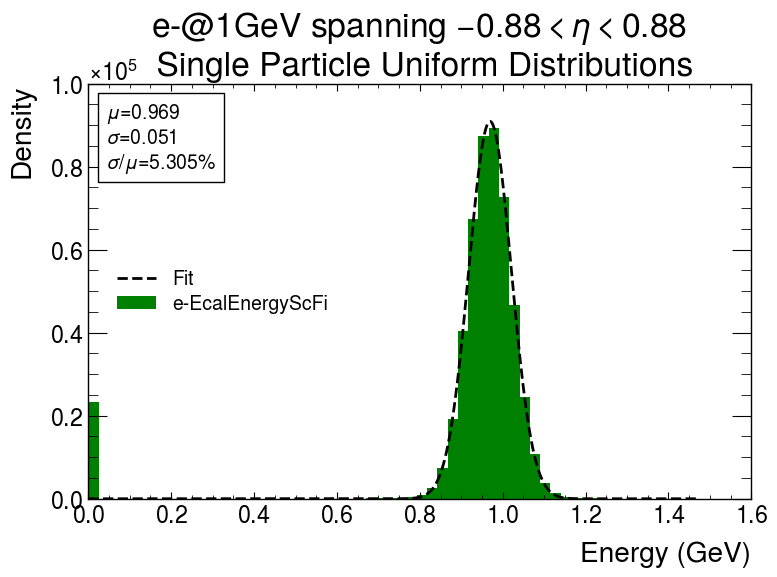

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/2GeV/45to135deg/e-_2GeV_45to135deg.0001.root
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 111507.86437596535, Mean = 1.9581251108270576, Standard Deviation = 0.07370756333810671


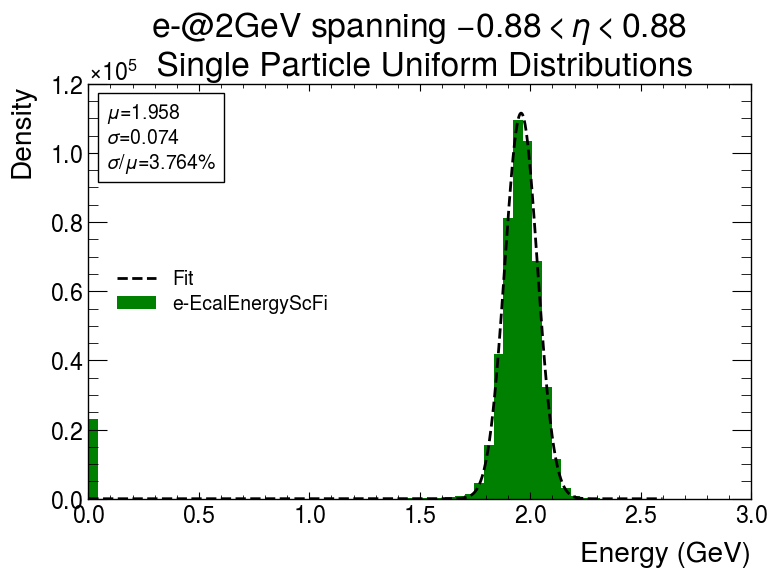

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/5GeV/45to135deg/e-_5GeV_45to135deg.0001.root
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 60512.8389775247, Mean = 4.941220555005569, Standard Deviation = 0.12159854254895008


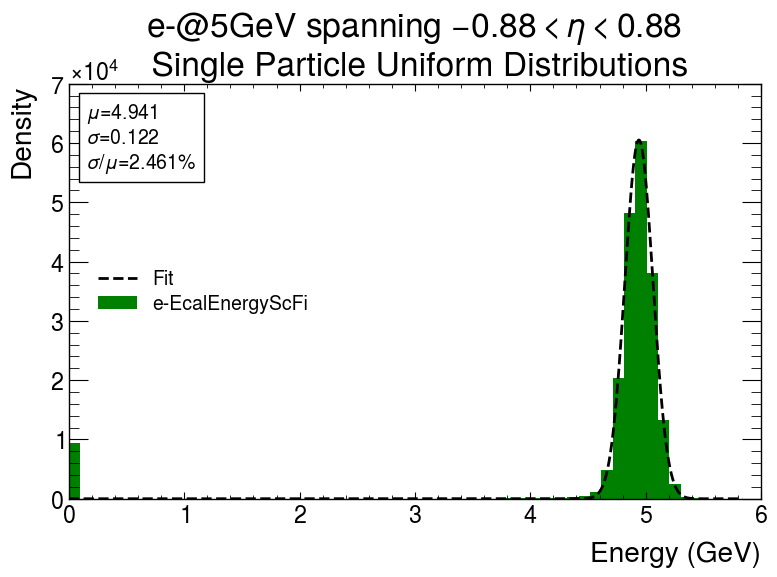

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/10GeV/45to135deg/e-_10GeV_45to135deg.0001.root
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 37370.94597818696, Mean = 9.944268153300435, Standard Deviation = 0.1810556640395234


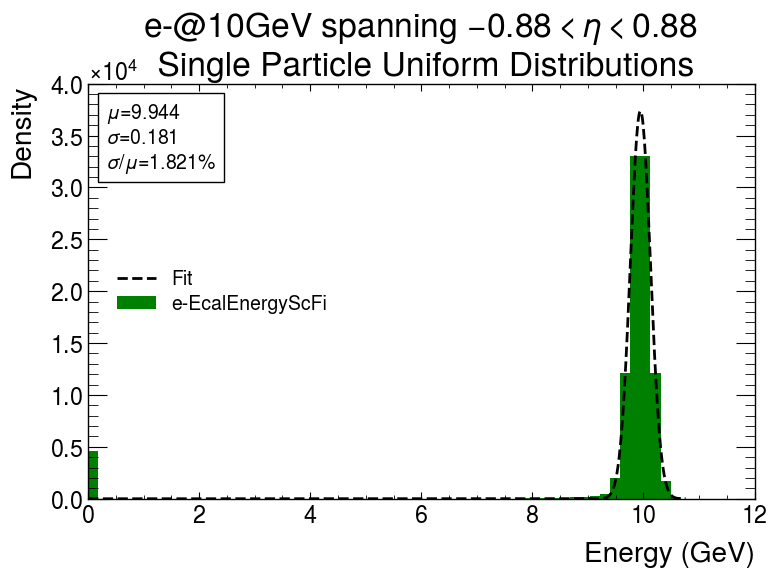

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/20GeV/45to135deg/e-_20GeV_45to135deg.0002.root
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 29342.951348532795, Mean = 19.99717874005994, Standard Deviation = 0.2798406423711757


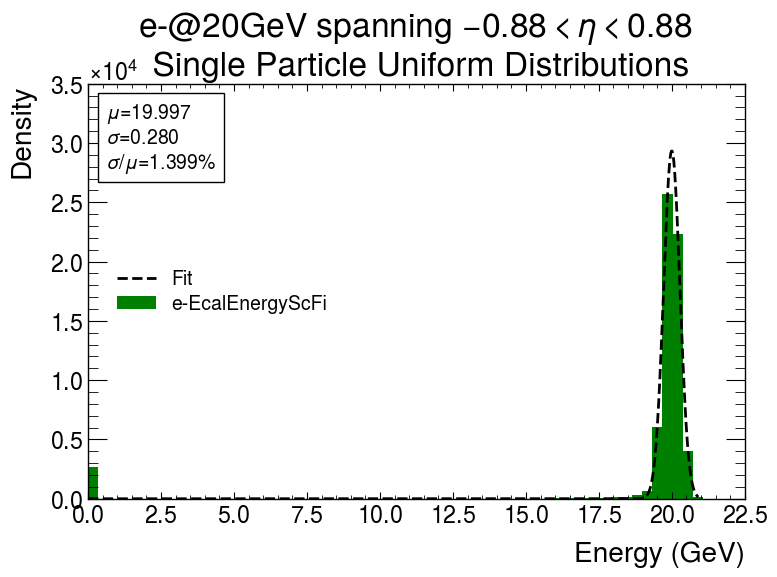

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/1GeV/45to135deg/gamma_1GeV_45to135deg.0001.root
Creating histogram named gammaECALEnergyFraction ... 
Creating histogram named gammaECALEnergyScFi ... 
Creating histogram named gammaECALEnergyBarrel ... 
Creating histogram named gammaECALEnergyEndcapP ... 
Creating histogram named gammaECALEnergyEndcapN ... 
Creating histogram named gammaECALEnergy ... 
Creating histogram named gammaHCALEnergy ... 
Creating histogram named gammaTotalEnergy ... 
Fit Parameters: 
Amplitude = 100277.89248843527, Mean = 0.9760777686131421, Standard Deviation = 0.051925136779485834


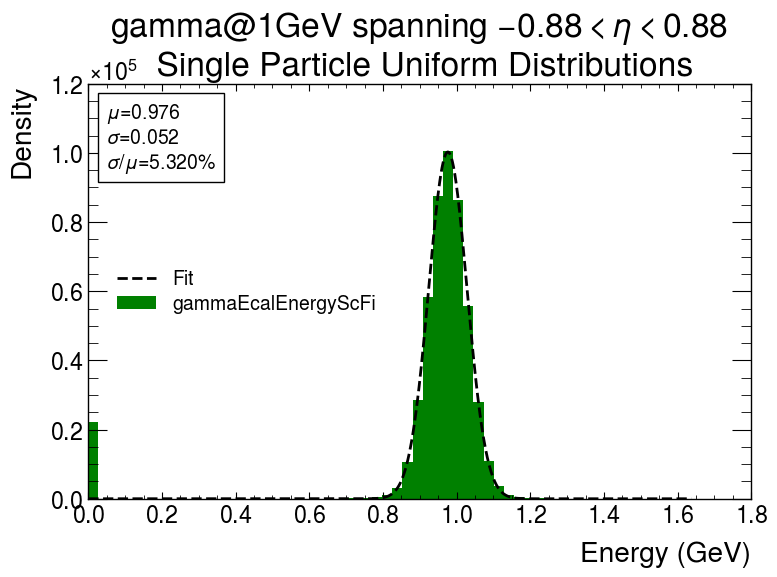

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/2GeV/45to135deg/gamma_2GeV_45to135deg.0001.root
Creating histogram named gammaECALEnergyFraction ... 
Creating histogram named gammaECALEnergyScFi ... 
Creating histogram named gammaECALEnergyBarrel ... 
Creating histogram named gammaECALEnergyEndcapP ... 
Creating histogram named gammaECALEnergyEndcapN ... 
Creating histogram named gammaECALEnergy ... 
Creating histogram named gammaHCALEnergy ... 
Creating histogram named gammaTotalEnergy ... 
Fit Parameters: 
Amplitude = 58860.22311094041, Mean = 1.9671819052426047, Standard Deviation = -0.07492788437226085


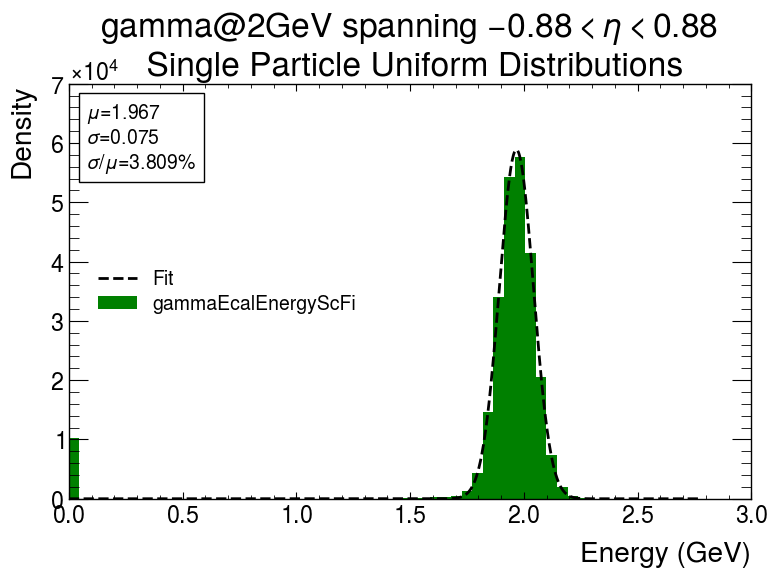

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/5GeV/45to135deg/gamma_5GeV_45to135deg.0001.root
Creating histogram named gammaECALEnergyFraction ... 
Creating histogram named gammaECALEnergyScFi ... 
Creating histogram named gammaECALEnergyBarrel ... 
Creating histogram named gammaECALEnergyEndcapP ... 
Creating histogram named gammaECALEnergyEndcapN ... 
Creating histogram named gammaECALEnergy ... 
Creating histogram named gammaHCALEnergy ... 
Creating histogram named gammaTotalEnergy ... 
Fit Parameters: 
Amplitude = 62466.71783377449, Mean = 4.962183616175871, Standard Deviation = -0.12608391443862008


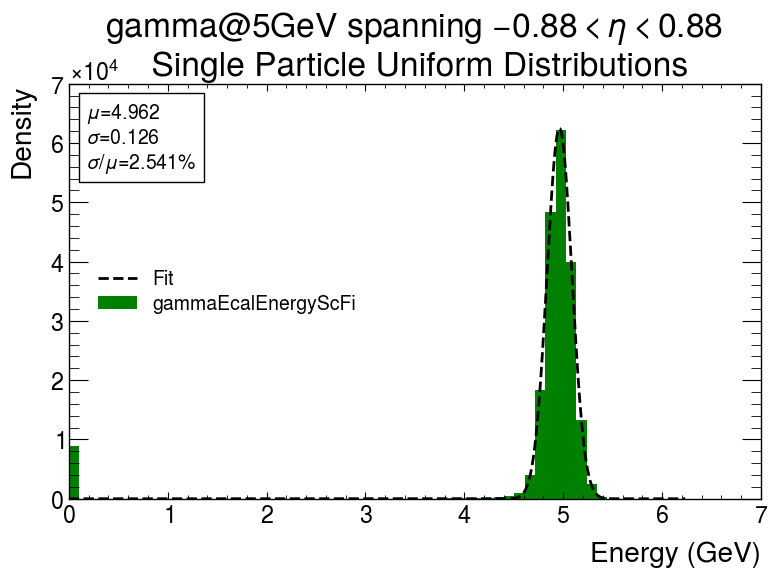

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/10GeV/45to135deg/gamma_10GeV_45to135deg.0001.root
Creating histogram named gammaECALEnergyFraction ... 
Creating histogram named gammaECALEnergyScFi ... 
Creating histogram named gammaECALEnergyBarrel ... 
Creating histogram named gammaECALEnergyEndcapP ... 
Creating histogram named gammaECALEnergyEndcapN ... 
Creating histogram named gammaECALEnergy ... 
Creating histogram named gammaHCALEnergy ... 
Creating histogram named gammaTotalEnergy ... 
Fit Parameters: 
Amplitude = 36442.83267470946, Mean = 9.983246872261615, Standard Deviation = 0.18955635271253396


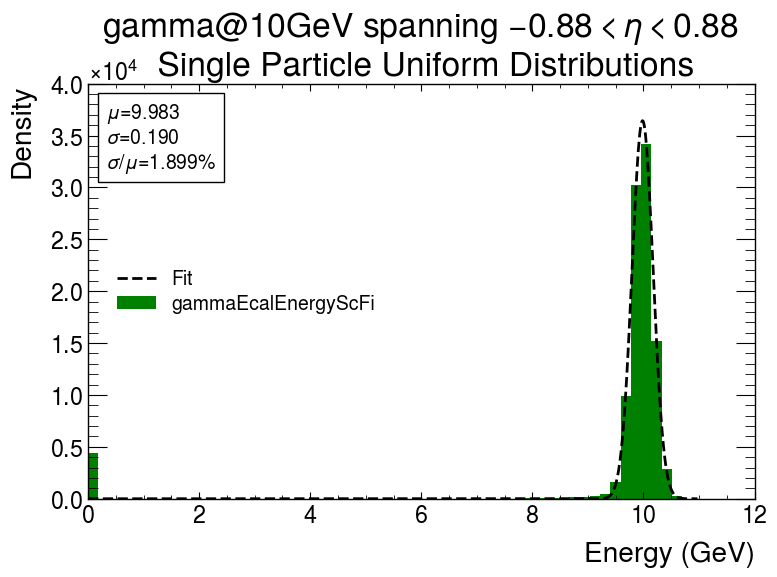

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/20GeV/45to135deg/gamma_20GeV_45to135deg.0001.root
Creating histogram named gammaECALEnergyFraction ... 
Creating histogram named gammaECALEnergyScFi ... 
Creating histogram named gammaECALEnergyBarrel ... 
Creating histogram named gammaECALEnergyEndcapP ... 
Creating histogram named gammaECALEnergyEndcapN ... 
Creating histogram named gammaECALEnergy ... 
Creating histogram named gammaHCALEnergy ... 
Creating histogram named gammaTotalEnergy ... 
Fit Parameters: 
Amplitude = 22310.108362752362, Mean = 20.071978206180443, Standard Deviation = 0.29690575286655807


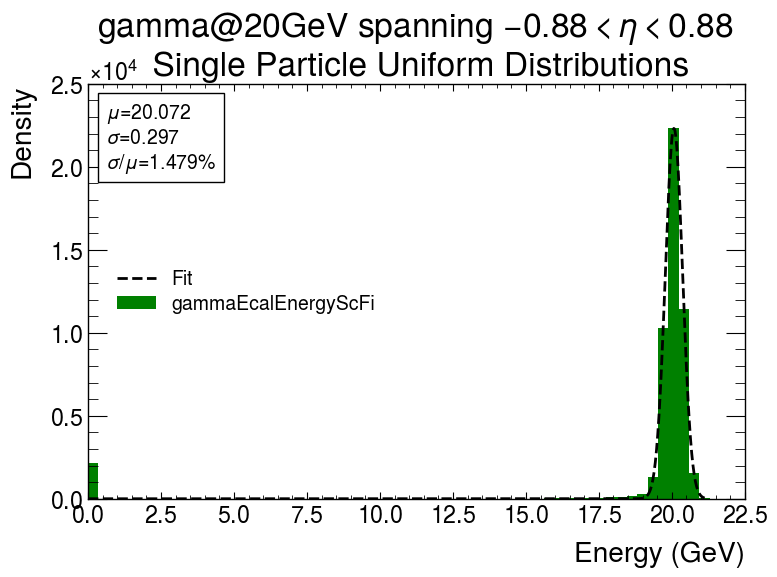

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/1GeV/45to135deg/kaon0L_1GeV_45to135deg.0001.root
Creating histogram named kaon0LECALEnergyFraction ... 
Creating histogram named kaon0LECALEnergyScFi ... 
Creating histogram named kaon0LECALEnergyBarrel ... 
Creating histogram named kaon0LECALEnergyEndcapP ... 
Creating histogram named kaon0LECALEnergyEndcapN ... 
Creating histogram named kaon0LECALEnergy ... 
Creating histogram named kaon0LHCALEnergy ... 
Creating histogram named kaon0LTotalEnergy ... 
Fit Parameters: 
Amplitude = 17600.024053732563, Mean = 1.0931216708907596, Standard Deviation = -0.29484716942356254


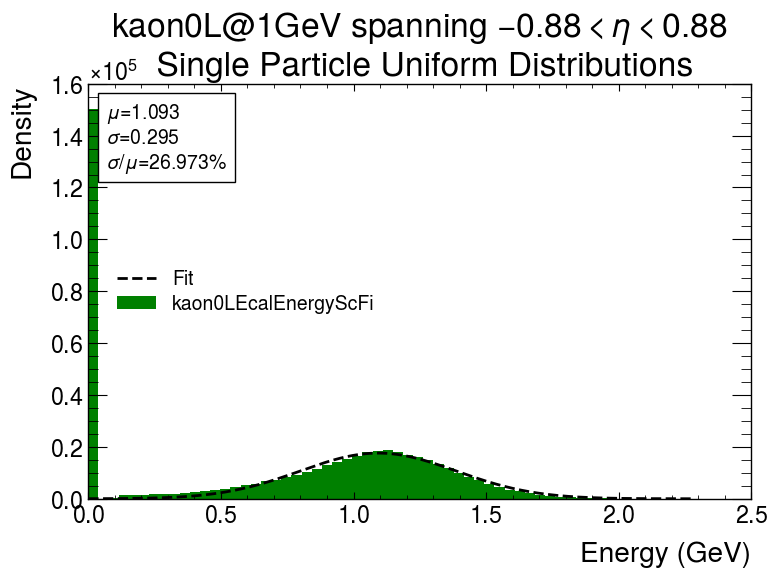

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/2GeV/45to135deg/kaon0L_2GeV_45to135deg.0001.root
Creating histogram named kaon0LECALEnergyFraction ... 
Creating histogram named kaon0LECALEnergyScFi ... 
Creating histogram named kaon0LECALEnergyBarrel ... 
Creating histogram named kaon0LECALEnergyEndcapP ... 
Creating histogram named kaon0LECALEnergyEndcapN ... 
Creating histogram named kaon0LECALEnergy ... 
Creating histogram named kaon0LHCALEnergy ... 
Creating histogram named kaon0LTotalEnergy ... 
Fit Parameters: 
Amplitude = 16471.783528221342, Mean = 1.9216210638960955, Standard Deviation = 0.5281639555816374


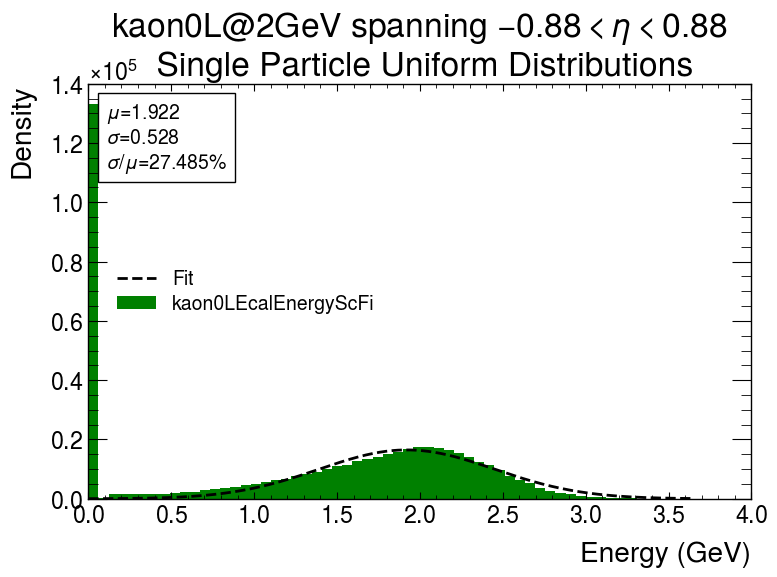

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/5GeV/45to135deg/kaon0L_5GeV_45to135deg.0001.root
Creating histogram named kaon0LECALEnergyFraction ... 
Creating histogram named kaon0LECALEnergyScFi ... 
Creating histogram named kaon0LECALEnergyBarrel ... 
Creating histogram named kaon0LECALEnergyEndcapP ... 
Creating histogram named kaon0LECALEnergyEndcapN ... 
Creating histogram named kaon0LECALEnergy ... 
Creating histogram named kaon0LHCALEnergy ... 
Creating histogram named kaon0LTotalEnergy ... 
Fit Parameters: 
Amplitude = 7929.164651617252, Mean = 4.591782087558027, Standard Deviation = 1.062257476898027


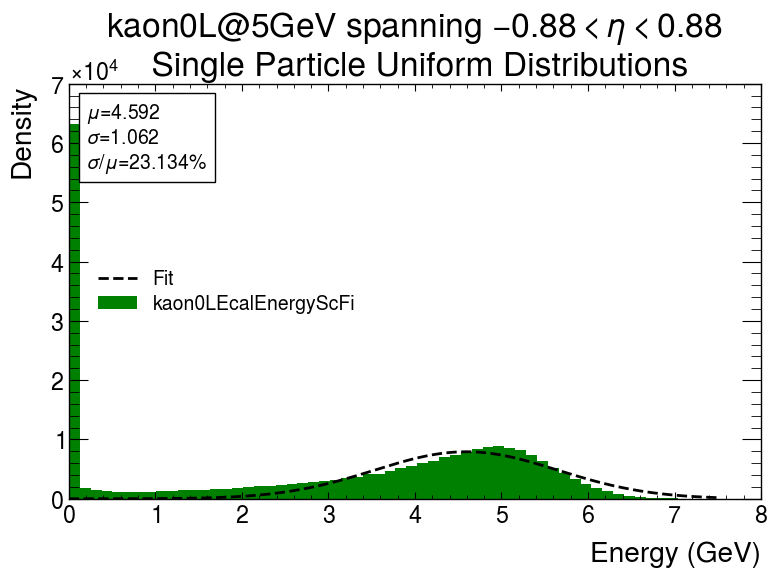

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/10GeV/45to135deg/kaon0L_10GeV_45to135deg.0001.root
Creating histogram named kaon0LECALEnergyFraction ... 
Creating histogram named kaon0LECALEnergyScFi ... 
Creating histogram named kaon0LECALEnergyBarrel ... 
Creating histogram named kaon0LECALEnergyEndcapP ... 
Creating histogram named kaon0LECALEnergyEndcapN ... 
Creating histogram named kaon0LECALEnergy ... 
Creating histogram named kaon0LHCALEnergy ... 
Creating histogram named kaon0LTotalEnergy ... 
Fit Parameters: 
Amplitude = 3502.238966701791, Mean = 8.391959749105604, Standard Deviation = -2.123475001648753


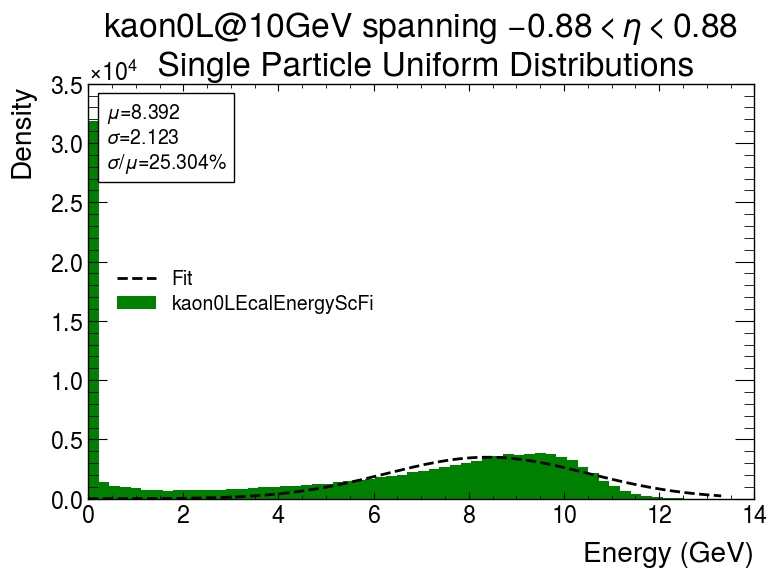

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/20GeV/45to135deg/kaon0L_20GeV_45to135deg.0001.root
Creating histogram named kaon0LECALEnergyFraction ... 
Creating histogram named kaon0LECALEnergyScFi ... 
Creating histogram named kaon0LECALEnergyBarrel ... 
Creating histogram named kaon0LECALEnergyEndcapP ... 
Creating histogram named kaon0LECALEnergyEndcapN ... 
Creating histogram named kaon0LECALEnergy ... 
Creating histogram named kaon0LHCALEnergy ... 
Creating histogram named kaon0LTotalEnergy ... 
Fit Parameters: 
Amplitude = 2227.691471755727, Mean = 14.500133651687326, Standard Deviation = 5.081634513154525


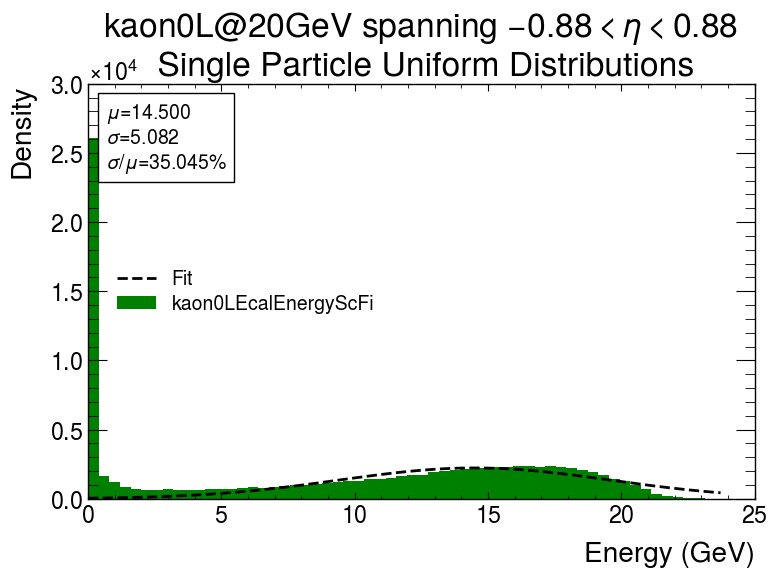

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/1GeV/45to135deg/neutron_1GeV_45to135deg.0001.root
Creating histogram named neutronECALEnergyFraction ... 
Creating histogram named neutronECALEnergyScFi ... 
Creating histogram named neutronECALEnergyBarrel ... 
Creating histogram named neutronECALEnergyEndcapP ... 
Creating histogram named neutronECALEnergyEndcapN ... 
Creating histogram named neutronECALEnergy ... 
Creating histogram named neutronHCALEnergy ... 
Creating histogram named neutronTotalEnergy ... 
Fit Parameters: 
Amplitude = 23232.67293521405, Mean = 0.4972980365796154, Standard Deviation = 0.1614651151793201


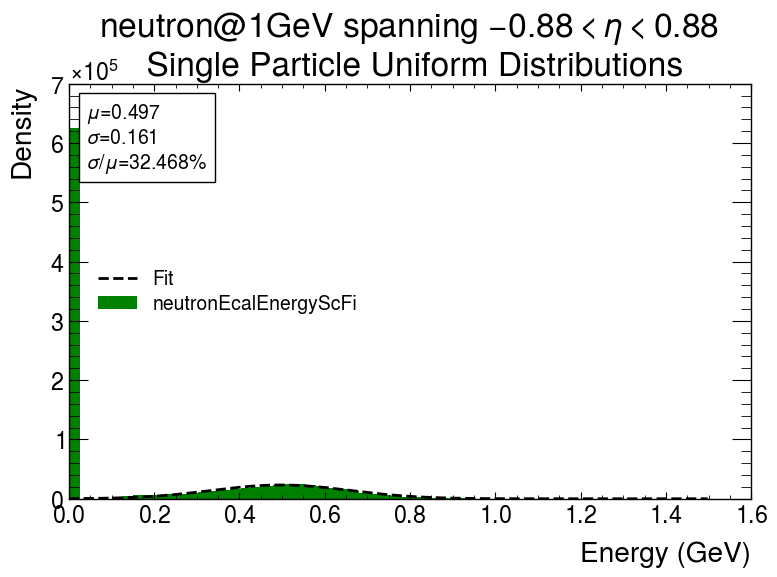

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/2GeV/45to135deg/neutron_2GeV_45to135deg.0001.root
Creating histogram named neutronECALEnergyFraction ... 
Creating histogram named neutronECALEnergyScFi ... 
Creating histogram named neutronECALEnergyBarrel ... 
Creating histogram named neutronECALEnergyEndcapP ... 
Creating histogram named neutronECALEnergyEndcapN ... 
Creating histogram named neutronECALEnergy ... 
Creating histogram named neutronHCALEnergy ... 
Creating histogram named neutronTotalEnergy ... 
Fit Parameters: 
Amplitude = 15284.346798984981, Mean = 1.245886736026219, Standard Deviation = 0.381399382713695


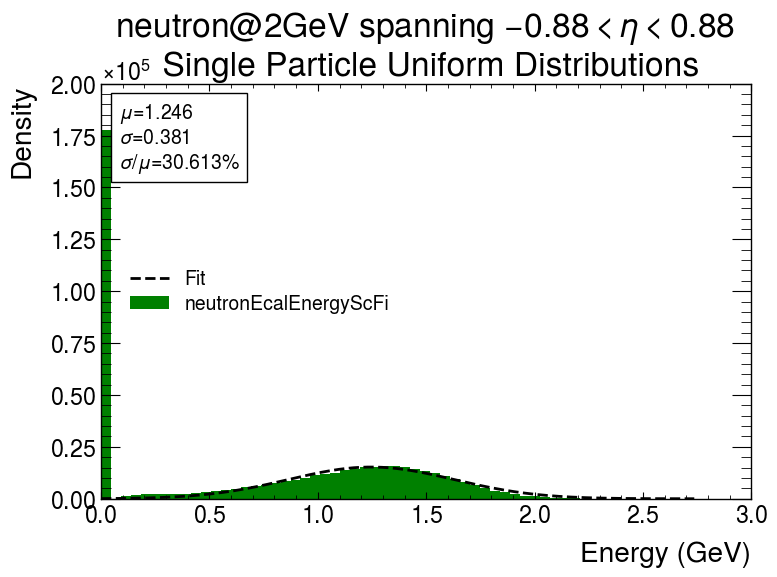

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/5GeV/45to135deg/neutron_5GeV_45to135deg.0001.root
Creating histogram named neutronECALEnergyFraction ... 
Creating histogram named neutronECALEnergyScFi ... 
Creating histogram named neutronECALEnergyBarrel ... 
Creating histogram named neutronECALEnergyEndcapP ... 
Creating histogram named neutronECALEnergyEndcapN ... 
Creating histogram named neutronECALEnergy ... 
Creating histogram named neutronHCALEnergy ... 
Creating histogram named neutronTotalEnergy ... 
Fit Parameters: 
Amplitude = 6492.316853208863, Mean = 3.6862326310350024, Standard Deviation = -1.1016471388552522


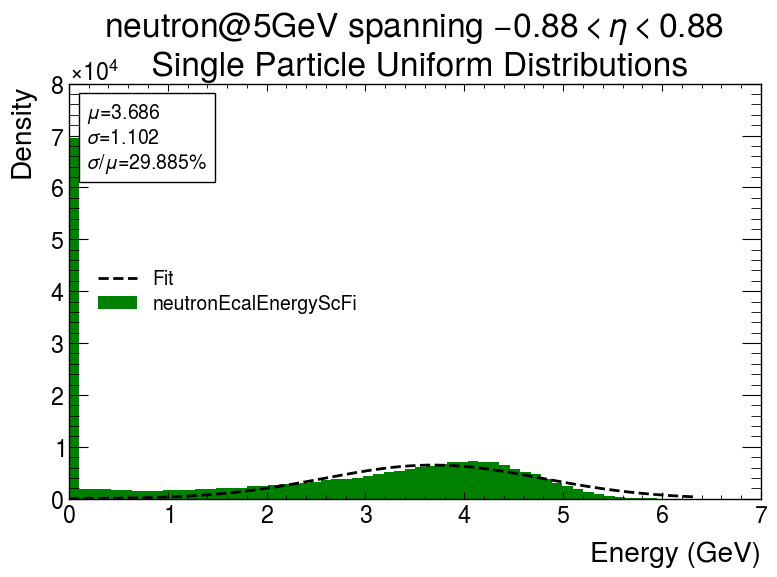

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/10GeV/45to135deg/neutron_10GeV_45to135deg.0001.root
Creating histogram named neutronECALEnergyFraction ... 
Creating histogram named neutronECALEnergyScFi ... 
Creating histogram named neutronECALEnergyBarrel ... 
Creating histogram named neutronECALEnergyEndcapP ... 
Creating histogram named neutronECALEnergyEndcapN ... 
Creating histogram named neutronECALEnergy ... 
Creating histogram named neutronHCALEnergy ... 
Creating histogram named neutronTotalEnergy ... 
Fit Parameters: 
Amplitude = 2785.592989523395, Mean = 7.0879132092419805, Standard Deviation = -2.5984668530451787


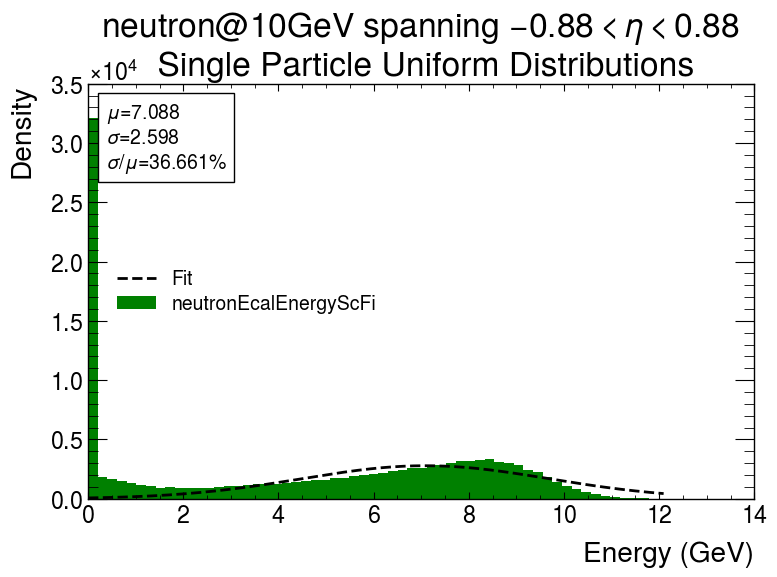

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/20GeV/45to135deg/neutron_20GeV_45to135deg.0001.root
Creating histogram named neutronECALEnergyFraction ... 
Creating histogram named neutronECALEnergyScFi ... 
Creating histogram named neutronECALEnergyBarrel ... 
Creating histogram named neutronECALEnergyEndcapP ... 
Creating histogram named neutronECALEnergyEndcapN ... 
Creating histogram named neutronECALEnergy ... 
Creating histogram named neutronHCALEnergy ... 
Creating histogram named neutronTotalEnergy ... 
Fit Parameters: 
Amplitude = 2076.6413082470544, Mean = 13.10205682406153, Standard Deviation = 5.3007255620062015


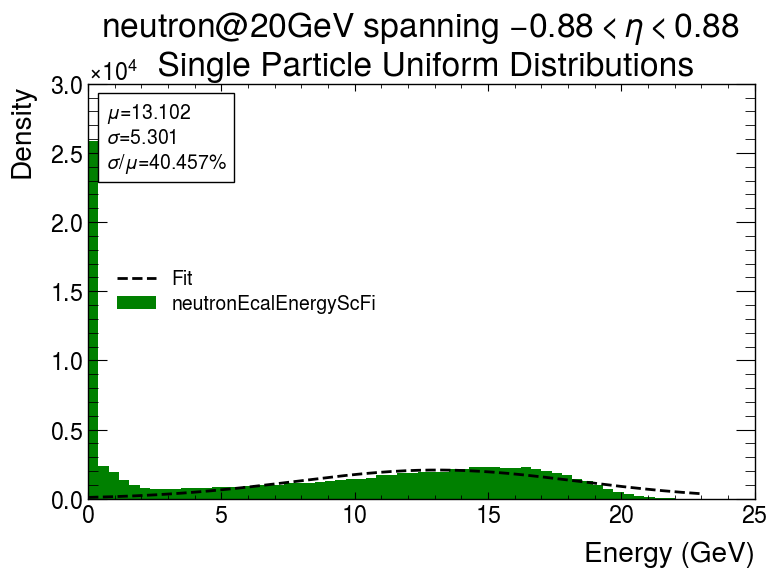

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/1GeV/45to135deg/pi+_1GeV_45to135deg.0001.root
Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergyScFi ... 
Creating histogram named pi+ECALEnergyBarrel ... 
Creating histogram named pi+ECALEnergyEndcapP ... 
Creating histogram named pi+ECALEnergyEndcapN ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 
Creating histogram named pi+TotalEnergy ... 
Fit Parameters: 
Amplitude = 28.254780896123684, Mean = 1.0715045664602694, Standard Deviation = -0.2576201837373635


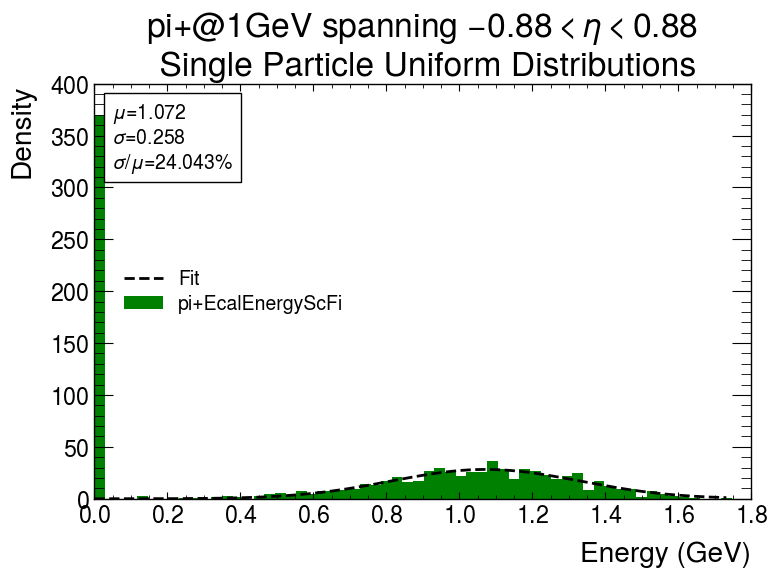

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/2GeV/45to135deg/pi+_2GeV_45to135deg.0001.root
Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergyScFi ... 
Creating histogram named pi+ECALEnergyBarrel ... 
Creating histogram named pi+ECALEnergyEndcapP ... 
Creating histogram named pi+ECALEnergyEndcapN ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 
Creating histogram named pi+TotalEnergy ... 
Fit Parameters: 
Amplitude = 17237.02269309869, Mean = 1.947263600450878, Standard Deviation = 0.4811552993869236


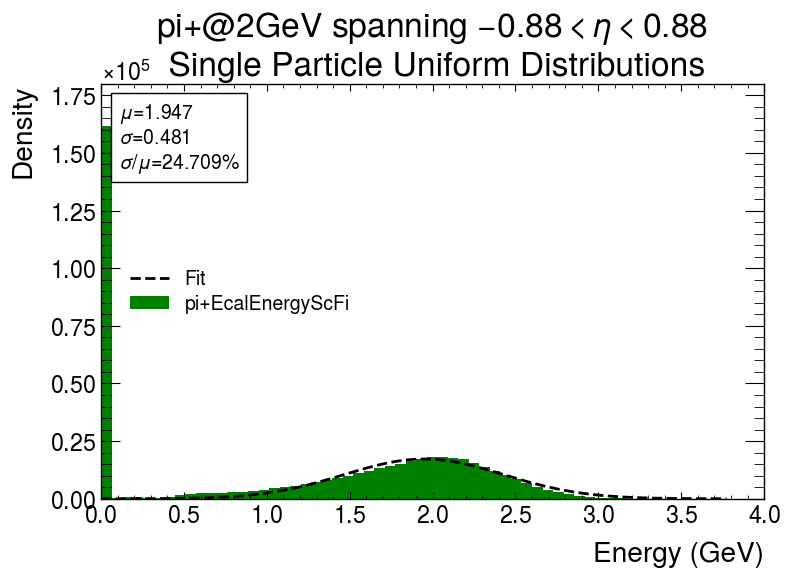

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/5GeV/45to135deg/pi+_5GeV_45to135deg.0001.root
Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergyScFi ... 
Creating histogram named pi+ECALEnergyBarrel ... 
Creating histogram named pi+ECALEnergyEndcapP ... 
Creating histogram named pi+ECALEnergyEndcapN ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 
Creating histogram named pi+TotalEnergy ... 
Fit Parameters: 
Amplitude = 7777.294146748879, Mean = 4.665587378017066, Standard Deviation = -0.9775513438606588


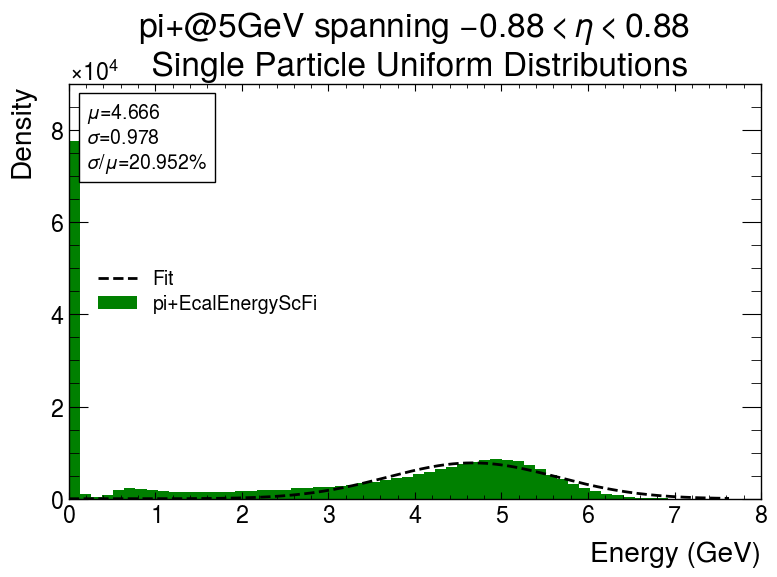

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/10GeV/45to135deg/pi+_10GeV_45to135deg.0001.root
Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergyScFi ... 
Creating histogram named pi+ECALEnergyBarrel ... 
Creating histogram named pi+ECALEnergyEndcapP ... 
Creating histogram named pi+ECALEnergyEndcapN ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 
Creating histogram named pi+TotalEnergy ... 
Fit Parameters: 
Amplitude = 3195.2270358621904, Mean = 8.506214263287532, Standard Deviation = 2.0493764634930813


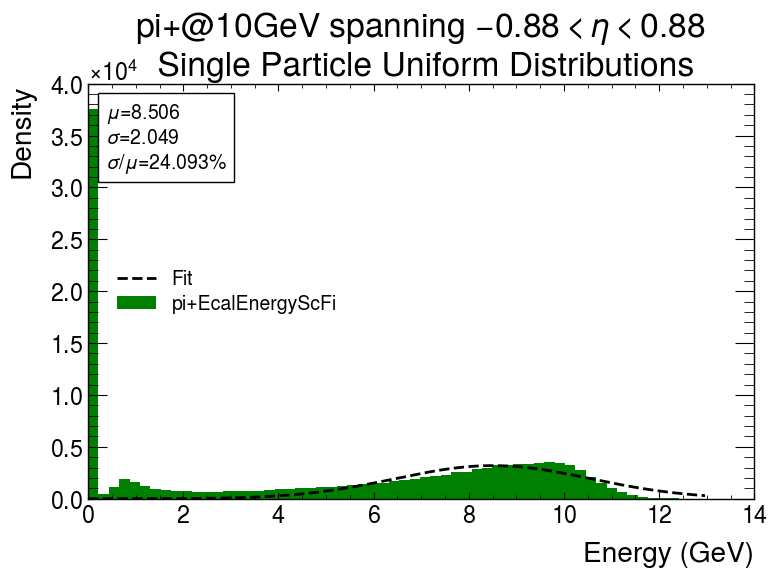

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/20GeV/45to135deg/pi+_20GeV_45to135deg.0001.root
Creating histogram named pi+ECALEnergyFraction ... 
Creating histogram named pi+ECALEnergyScFi ... 
Creating histogram named pi+ECALEnergyBarrel ... 
Creating histogram named pi+ECALEnergyEndcapP ... 
Creating histogram named pi+ECALEnergyEndcapN ... 
Creating histogram named pi+ECALEnergy ... 
Creating histogram named pi+HCALEnergy ... 
Creating histogram named pi+TotalEnergy ... 
Fit Parameters: 
Amplitude = 1988.7427181888067, Mean = 14.694545609222823, Standard Deviation = 5.197164408728004


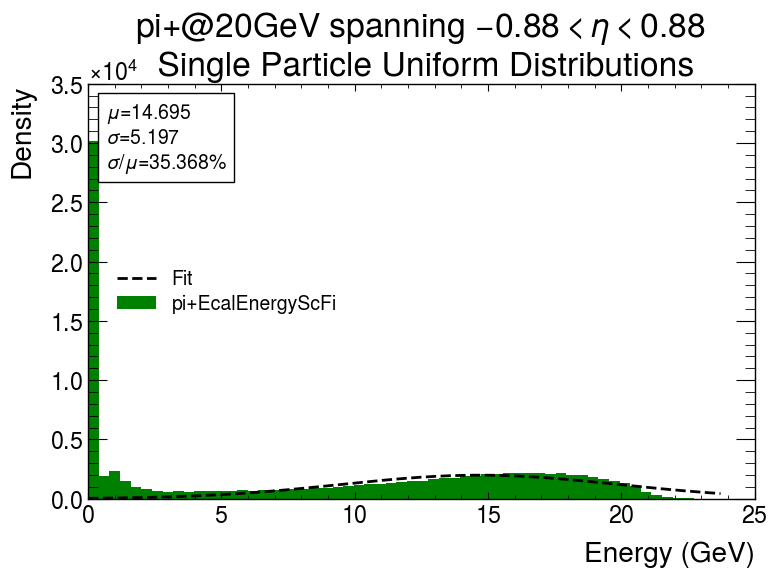

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/1GeV/45to135deg/pi0_1GeV_45to135deg.0001.root
Creating histogram named pi0ECALEnergyFraction ... 
Creating histogram named pi0ECALEnergyScFi ... 
Creating histogram named pi0ECALEnergyBarrel ... 
Creating histogram named pi0ECALEnergyEndcapP ... 
Creating histogram named pi0ECALEnergyEndcapN ... 
Creating histogram named pi0ECALEnergy ... 
Creating histogram named pi0HCALEnergy ... 
Creating histogram named pi0TotalEnergy ... 
Fit Parameters: 
Amplitude = 58896.768255683266, Mean = 0.9632113316429107, Standard Deviation = 0.07131689965969434


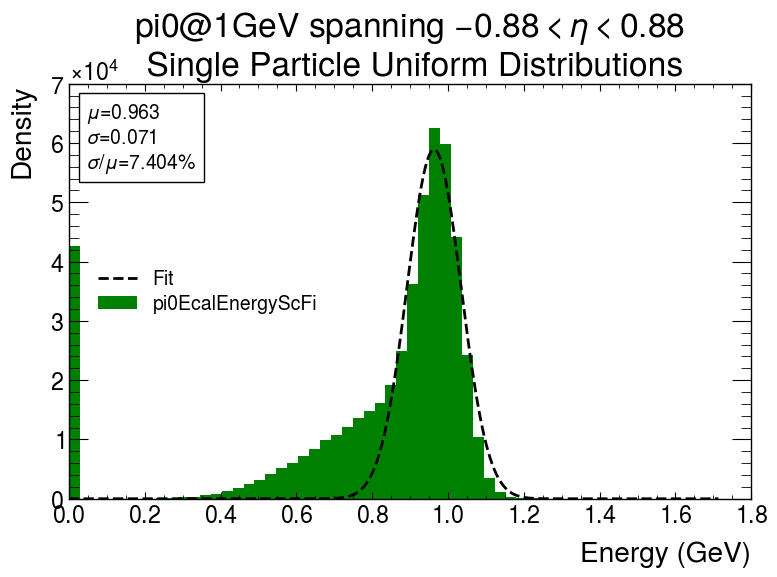

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/2GeV/45to135deg/pi0_2GeV_45to135deg.0001.root
Creating histogram named pi0ECALEnergyFraction ... 
Creating histogram named pi0ECALEnergyScFi ... 
Creating histogram named pi0ECALEnergyBarrel ... 
Creating histogram named pi0ECALEnergyEndcapP ... 
Creating histogram named pi0ECALEnergyEndcapN ... 
Creating histogram named pi0ECALEnergy ... 
Creating histogram named pi0HCALEnergy ... 
Creating histogram named pi0TotalEnergy ... 
Fit Parameters: 
Amplitude = 49332.17563234472, Mean = 1.958206995125008, Standard Deviation = -0.07923851646923757


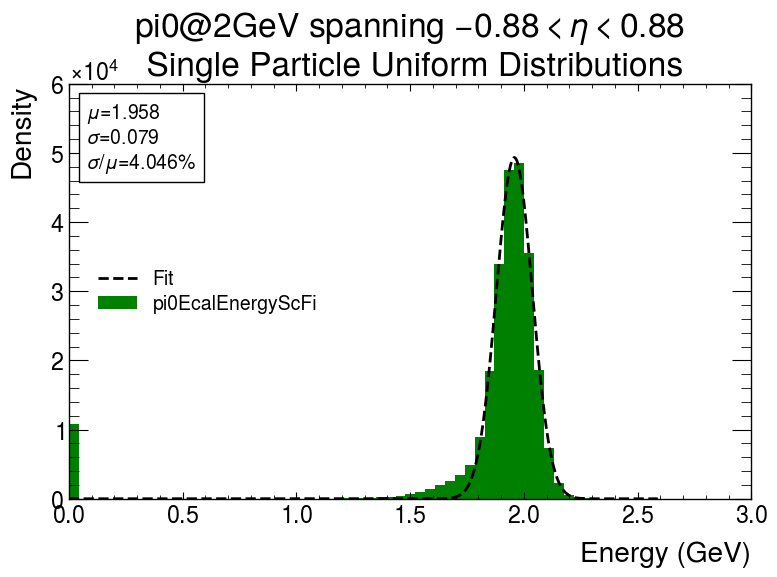

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/5GeV/45to135deg/pi0_5GeV_45to135deg.0001.root
Creating histogram named pi0ECALEnergyFraction ... 
Creating histogram named pi0ECALEnergyScFi ... 
Creating histogram named pi0ECALEnergyBarrel ... 
Creating histogram named pi0ECALEnergyEndcapP ... 
Creating histogram named pi0ECALEnergyEndcapN ... 
Creating histogram named pi0ECALEnergy ... 
Creating histogram named pi0HCALEnergy ... 
Creating histogram named pi0TotalEnergy ... 
Fit Parameters: 
Amplitude = 62677.45927430794, Mean = 4.945381023483236, Standard Deviation = 0.12512668779841038


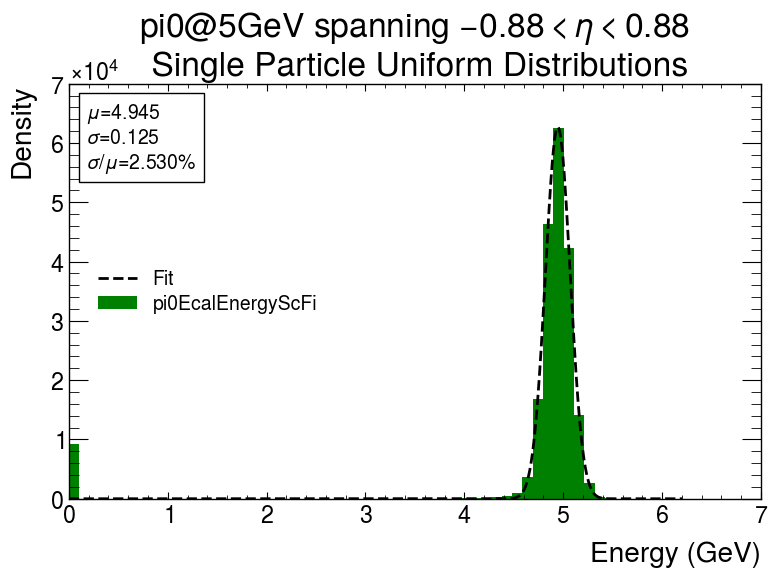

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/10GeV/45to135deg/pi0_10GeV_45to135deg.0001.root
Creating histogram named pi0ECALEnergyFraction ... 
Creating histogram named pi0ECALEnergyScFi ... 
Creating histogram named pi0ECALEnergyBarrel ... 
Creating histogram named pi0ECALEnergyEndcapP ... 
Creating histogram named pi0ECALEnergyEndcapN ... 
Creating histogram named pi0ECALEnergy ... 
Creating histogram named pi0HCALEnergy ... 
Creating histogram named pi0TotalEnergy ... 
Fit Parameters: 
Amplitude = 37139.97458253321, Mean = 9.952535742495158, Standard Deviation = 0.18691141884809942


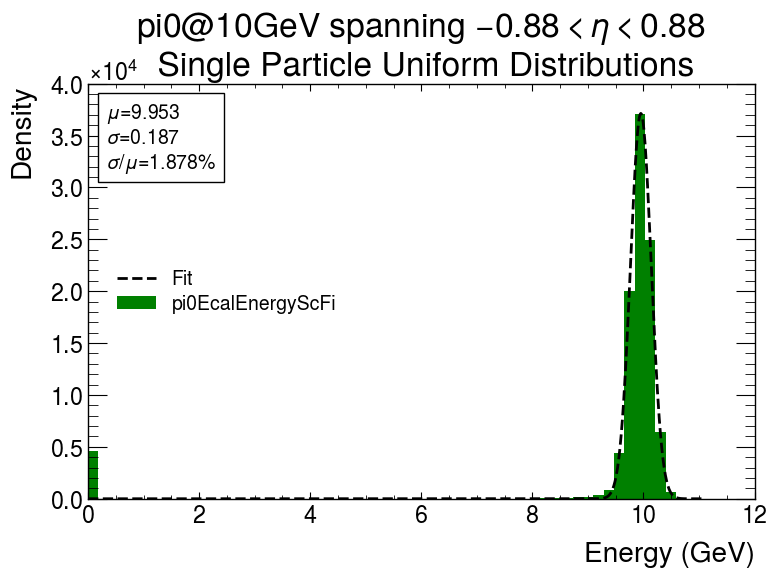

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/20GeV/45to135deg/pi0_20GeV_45to135deg.0001.root
Creating histogram named pi0ECALEnergyFraction ... 
Creating histogram named pi0ECALEnergyScFi ... 
Creating histogram named pi0ECALEnergyBarrel ... 
Creating histogram named pi0ECALEnergyEndcapP ... 
Creating histogram named pi0ECALEnergyEndcapN ... 
Creating histogram named pi0ECALEnergy ... 
Creating histogram named pi0HCALEnergy ... 
Creating histogram named pi0TotalEnergy ... 
Fit Parameters: 
Amplitude = 22928.038171817097, Mean = 20.020850540205235, Standard Deviation = 0.2896993827181697


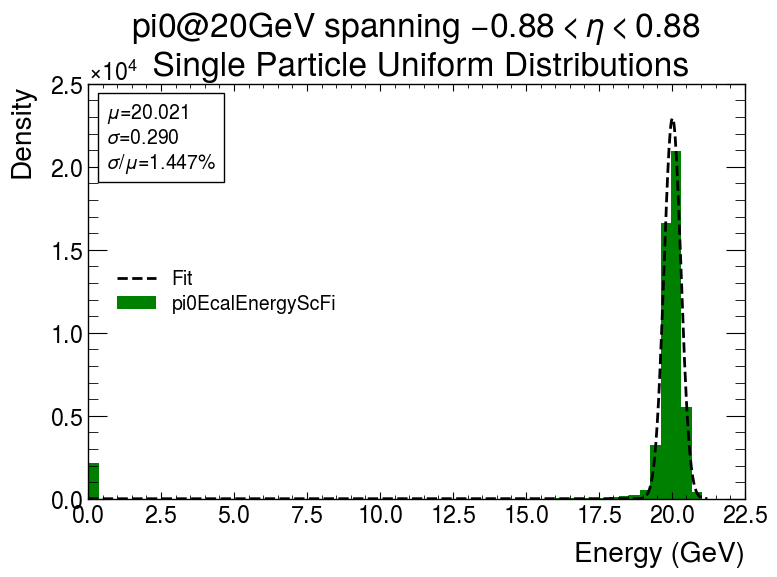

In [23]:
# Automate for every file. Depending on particle, the energy, and the eta range, plot the corresponding plots.

pp = PdfPages('ATHENA_FullSim_nrgRes.pdf')  # save all plots to one single pdf.
eRes = []
gRes = []
p0Res = []
ppRes = []
kRes = []
nRes = []

for j in range(len(recofiles)):
    for i in range(len(recofiles[j])):
        openreco = recofiles[j][i]
        print(openreco)
        recofile = uproot.open(openreco)
        recotree = recofile['events;1']

        particle_df = truth_df(recotree)
        eng = energies[j][i]
        rng = ranges[j][i]
        
        if "45to135" in openreco:
            eta_range = [-0.88, 0.88]
            if "e-" in openreco:
                particle_data, pp, mu, sigma = process(particle_df, "e-", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
                eRes.append(sigma/mu)
            elif "gamma" in openreco:
                particle_data, pp, mu, sigma = process(particle_df, "gamma", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
                gRes.append(sigma/mu)
            elif "kaon0L" in openreco:
                kaonLim = [0.1, 0.1, 0.2, 0.5, 1]
                #kaonLim = [0.01, 0.01, 0.02]
                particle_data, pp, mu, sigma = process(particle_df, "kaon0L", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff = kaonLim[i])
                kRes.append(sigma/mu)
            elif "neutron" in openreco:
                neutronLim = [0.1, 0.1, 0.2, 0.5, 1]
                #neutronLim = [0.01, 0.01, 0.02]
                particle_data, pp, mu, sigma = process(particle_df, "neutron", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff = neutronLim[i])
                nRes.append(sigma/mu)
            elif "pi+" in openreco:
                pipLim = [0.1, 0.1, 0.2, 0.5, 1]
                #pipLim = [0.01, 0.01, 0.02]
                particle_data, pp, mu, sigma = process(particle_df, "pi+", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff = pipLim[i])
                ppRes.append(sigma/mu)
            elif "pi0" in openreco:
                particle_data, pp, mu, sigma = process(particle_df, "pi0", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
                p0Res.append(sigma/mu)
            
#         elif "130to177deg" in openreco:
#             eta_range = [-3.64, -0.76]
#             particle_data, pp, mu, sigma = process(particle_df, "e-", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
#             eRes.append(sigma/mu)
#         elif "3to50" in openreco:
#             eta_range = [0.76, 3.64]
#             if "pi+" in openreco:
#                 particle_data, pp, mu, sigma = process(particle_df, "pi+", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
#                 ppRes.append(sigma/mu)
#             elif "kaon0L" in openreco:
#                 particle_data, pp, mu, sigma = process(particle_df, "kaon0L", pp=pp, eta_range=eta_range, eng=eng, rng=rng, cutoff=0)
#                 kRes.append(sigma/mu)
                
pp.close()

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/1GeV/45to135deg/e-_1GeV_45to135deg.0001.root
3


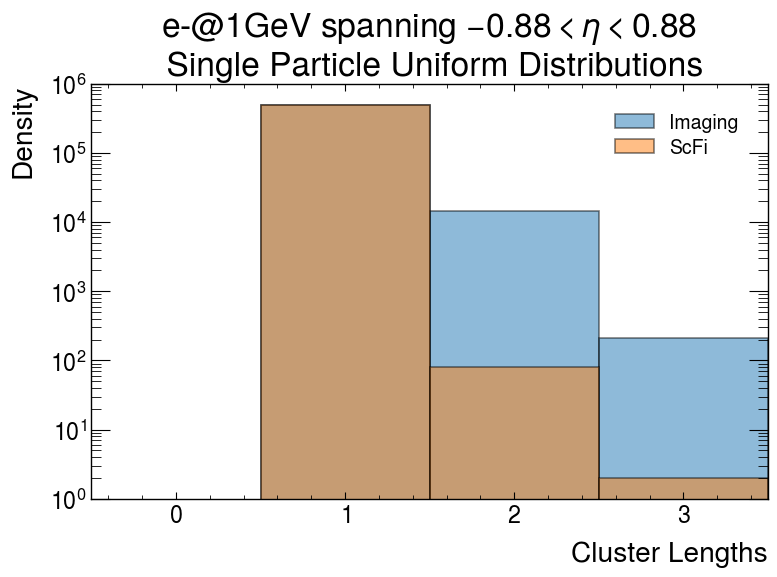

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/2GeV/45to135deg/e-_2GeV_45to135deg.0001.root
3


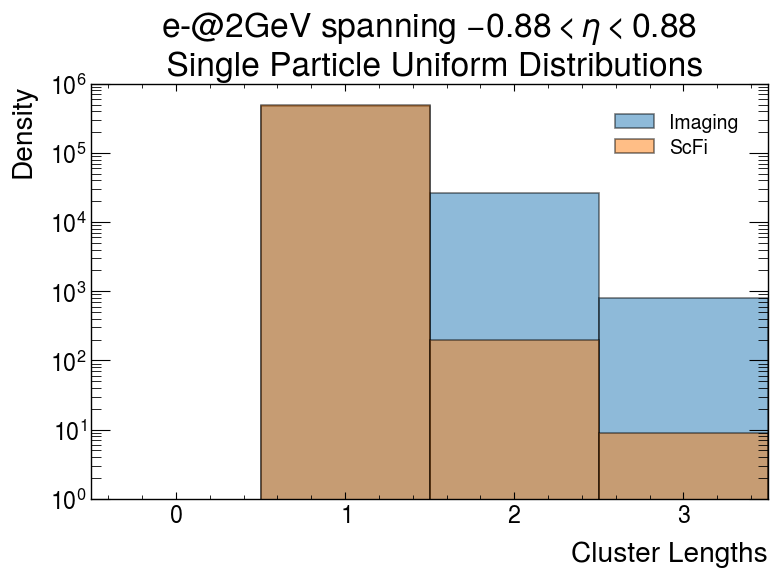

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/5GeV/45to135deg/e-_5GeV_45to135deg.0001.root
3


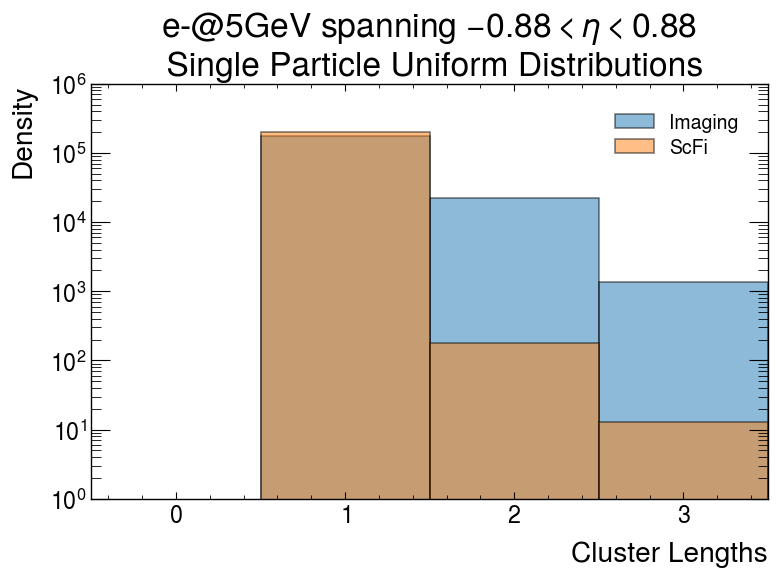

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/10GeV/45to135deg/e-_10GeV_45to135deg.0001.root
3


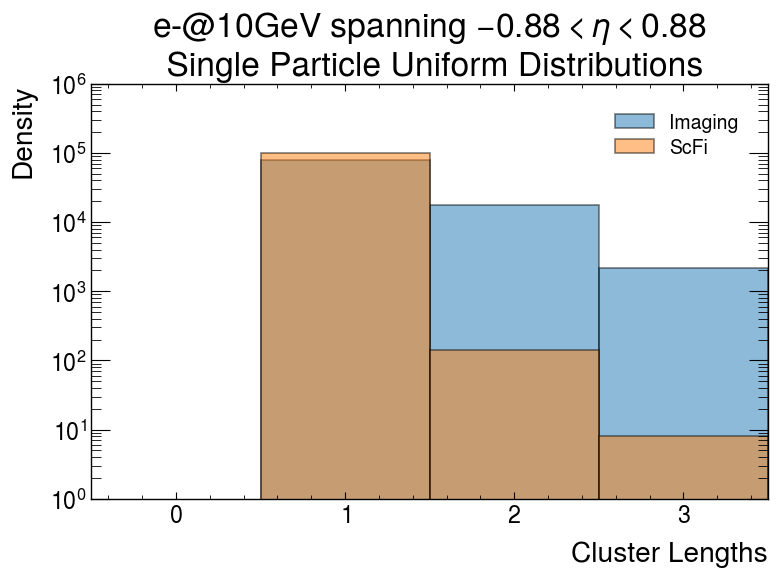

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/e-/20GeV/45to135deg/e-_20GeV_45to135deg.0002.root
3


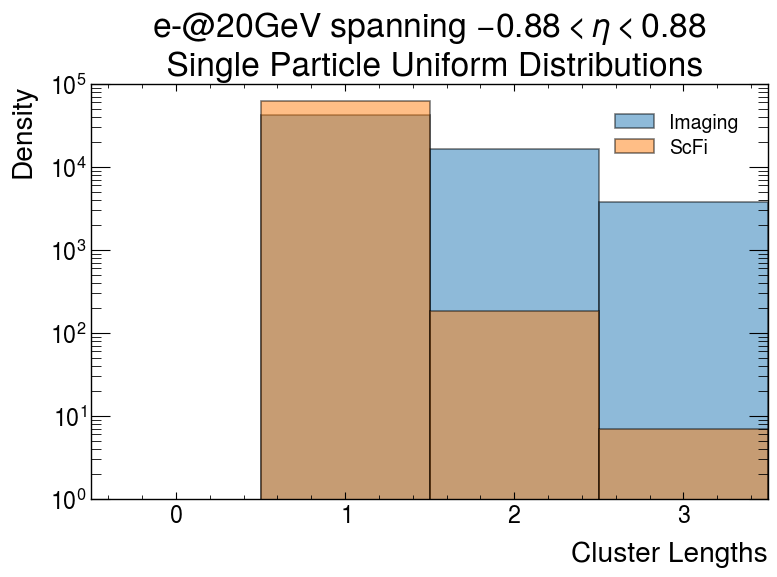

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/1GeV/45to135deg/gamma_1GeV_45to135deg.0001.root
3


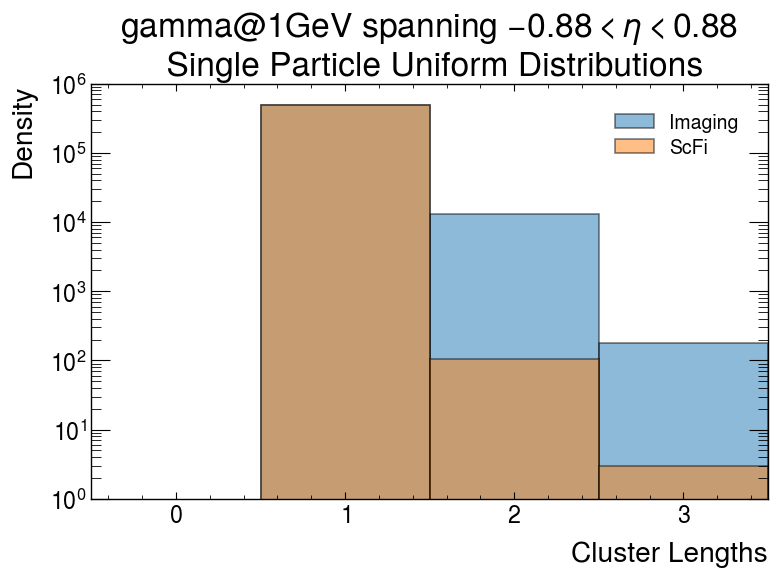

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/2GeV/45to135deg/gamma_2GeV_45to135deg.0001.root
3


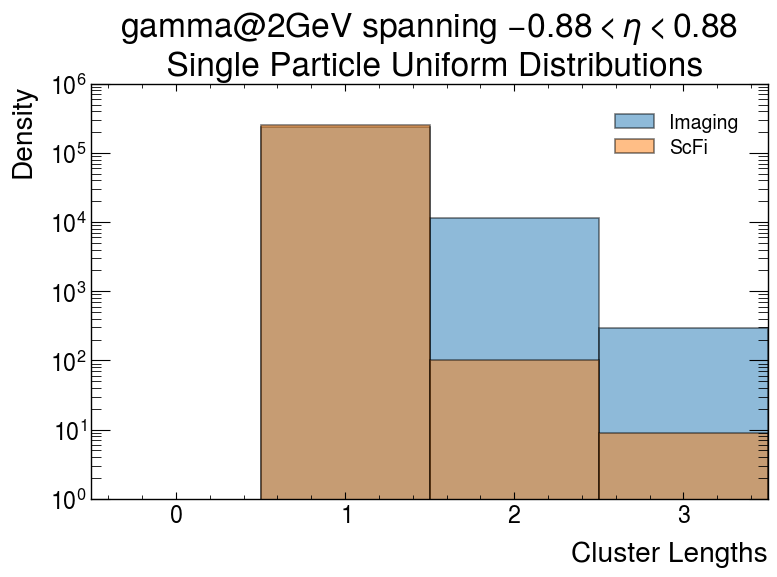

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/5GeV/45to135deg/gamma_5GeV_45to135deg.0001.root
6


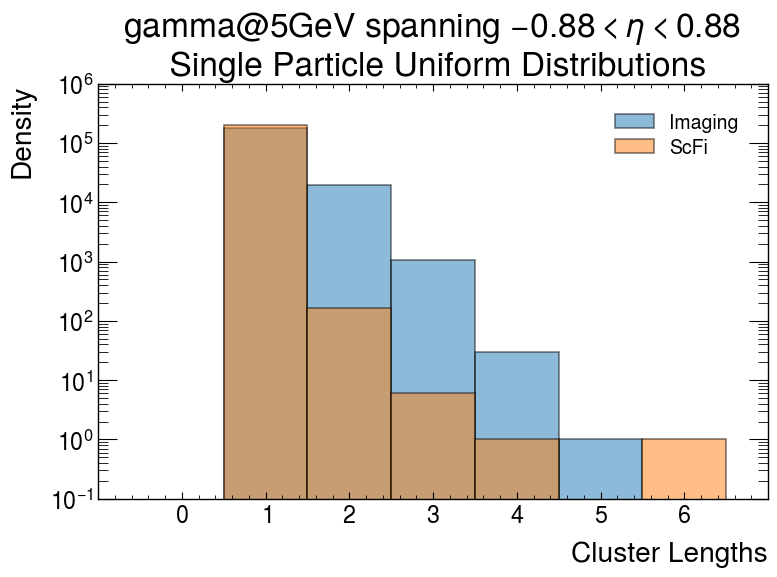

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/10GeV/45to135deg/gamma_10GeV_45to135deg.0001.root
4


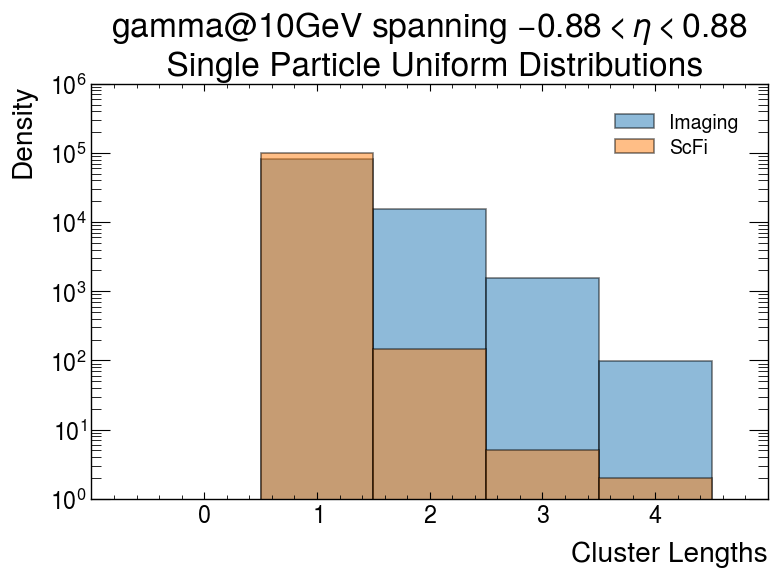

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/gamma/20GeV/45to135deg/gamma_20GeV_45to135deg.0001.root
3


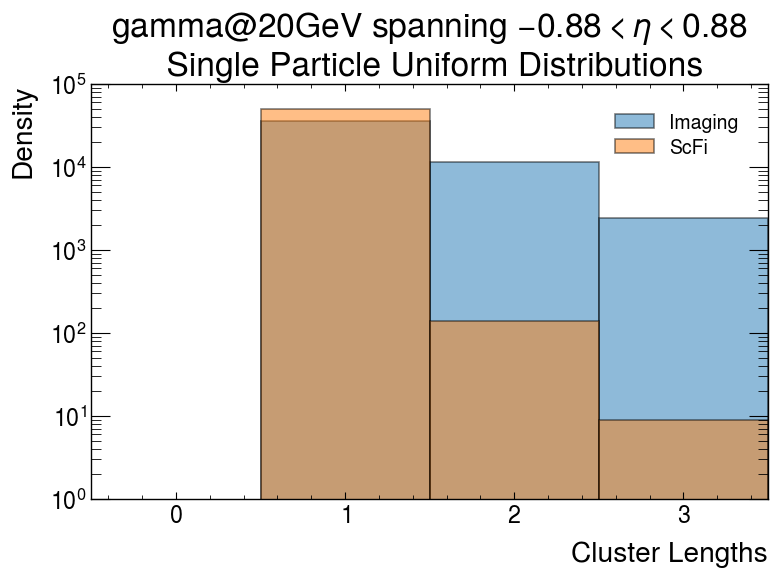

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/1GeV/45to135deg/kaon0L_1GeV_45to135deg.0001.root
4


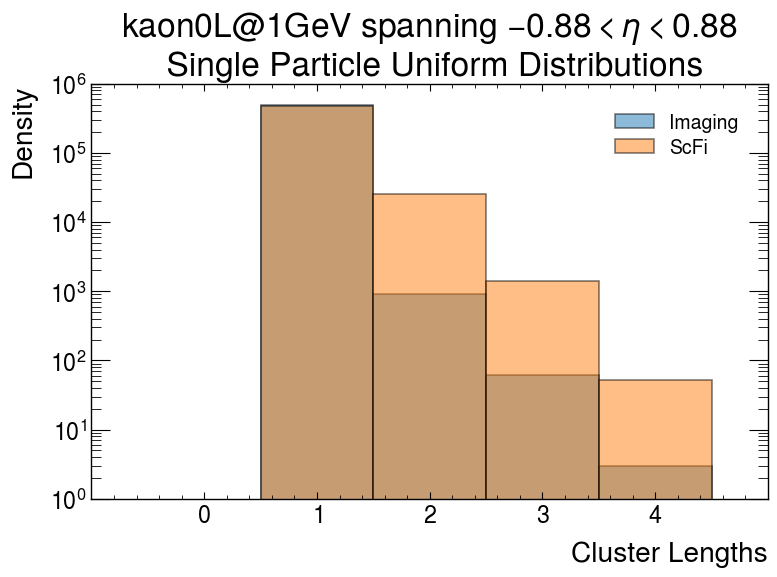

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/2GeV/45to135deg/kaon0L_2GeV_45to135deg.0001.root
6


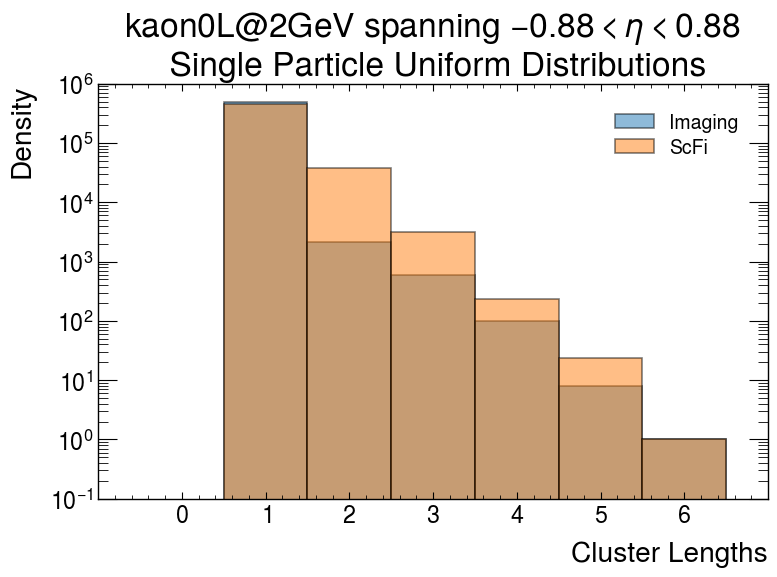

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/5GeV/45to135deg/kaon0L_5GeV_45to135deg.0001.root
7


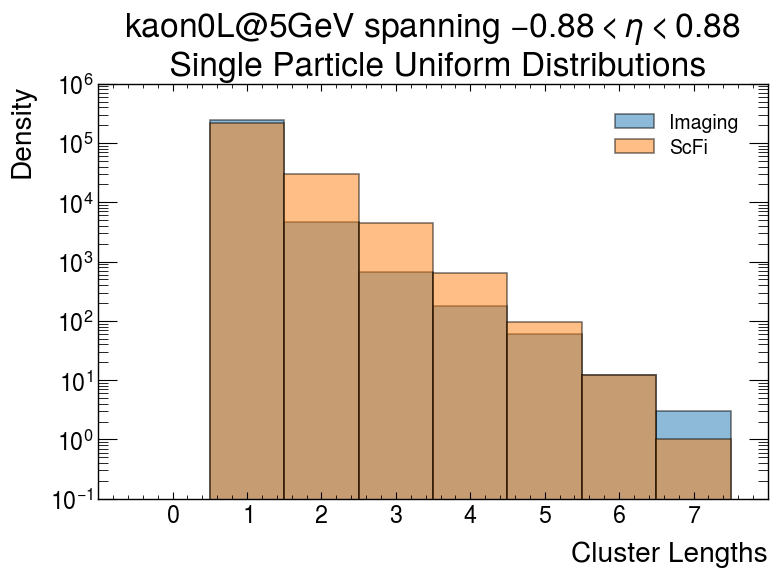

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/10GeV/45to135deg/kaon0L_10GeV_45to135deg.0001.root
7


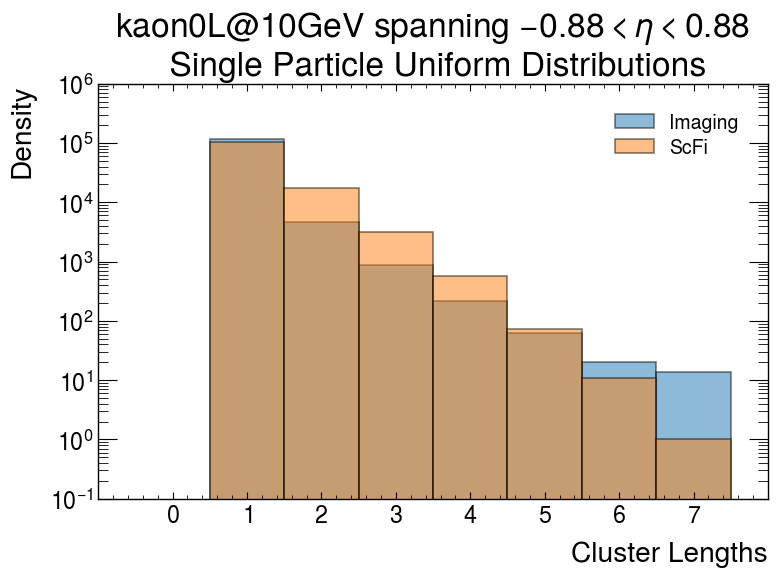

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/kaon0L/20GeV/45to135deg/kaon0L_20GeV_45to135deg.0001.root
8


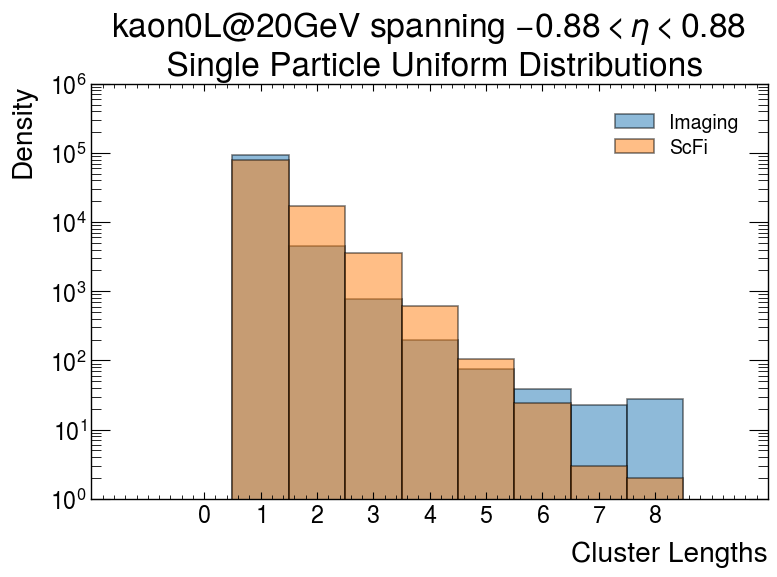

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/1GeV/45to135deg/neutron_1GeV_45to135deg.0001.root
4


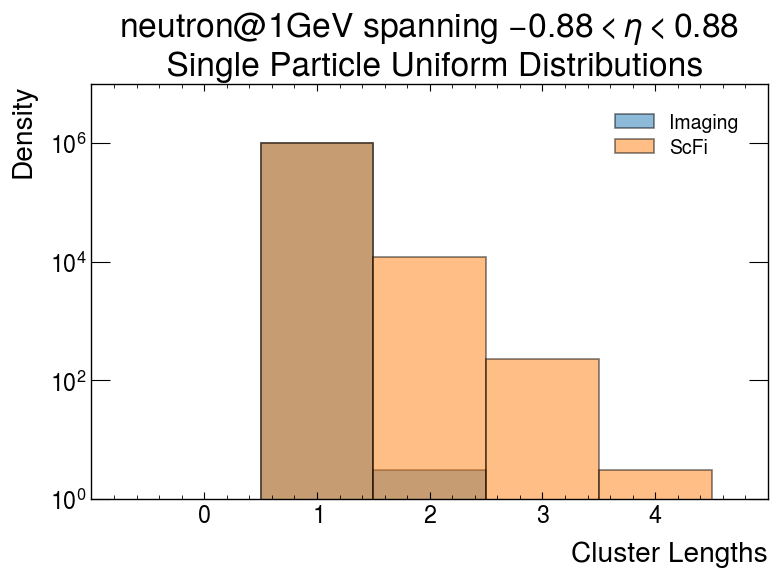

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/2GeV/45to135deg/neutron_2GeV_45to135deg.0001.root
5


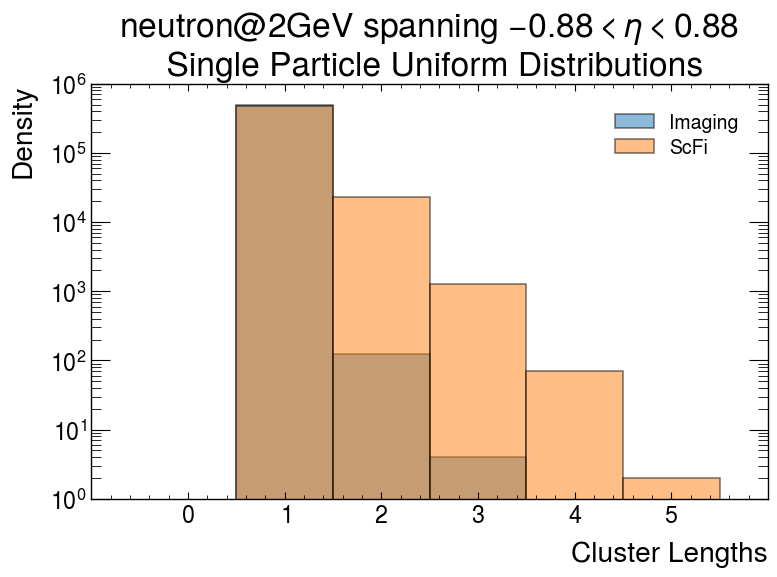

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/5GeV/45to135deg/neutron_5GeV_45to135deg.0001.root
7


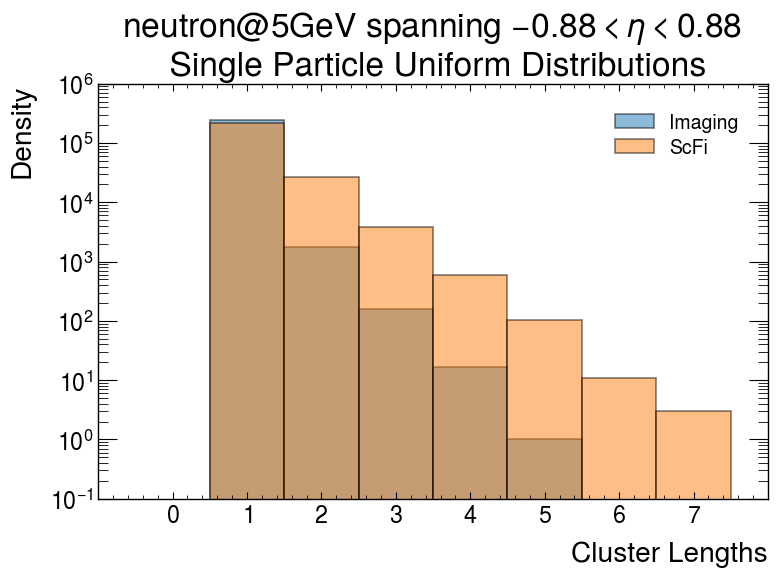

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/10GeV/45to135deg/neutron_10GeV_45to135deg.0001.root
8


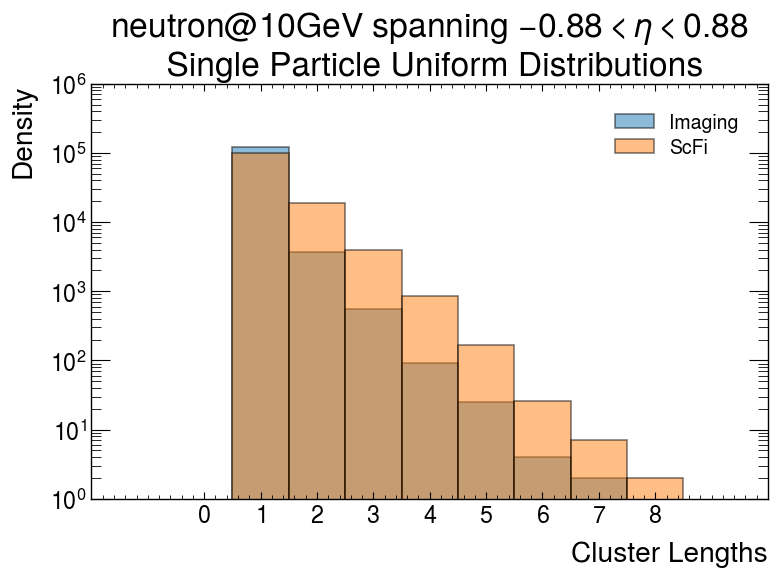

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/neutron/20GeV/45to135deg/neutron_20GeV_45to135deg.0001.root
8


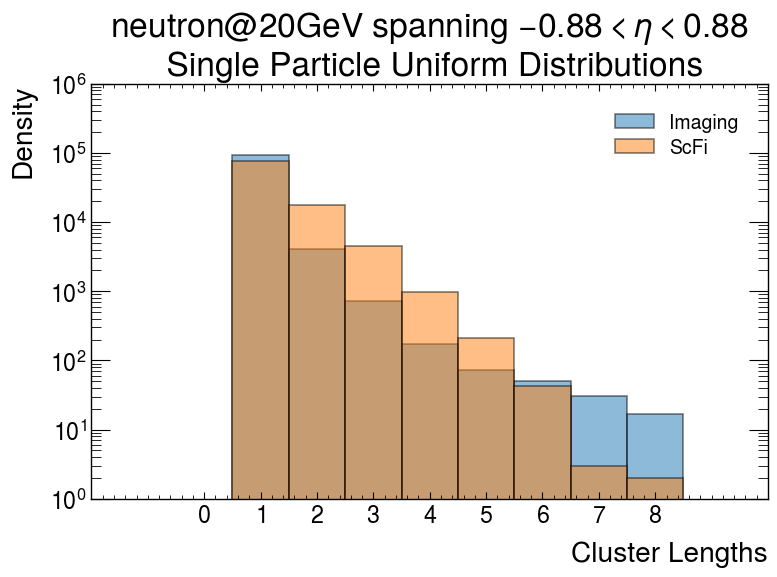

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/1GeV/45to135deg/pi+_1GeV_45to135deg.0001.root
3


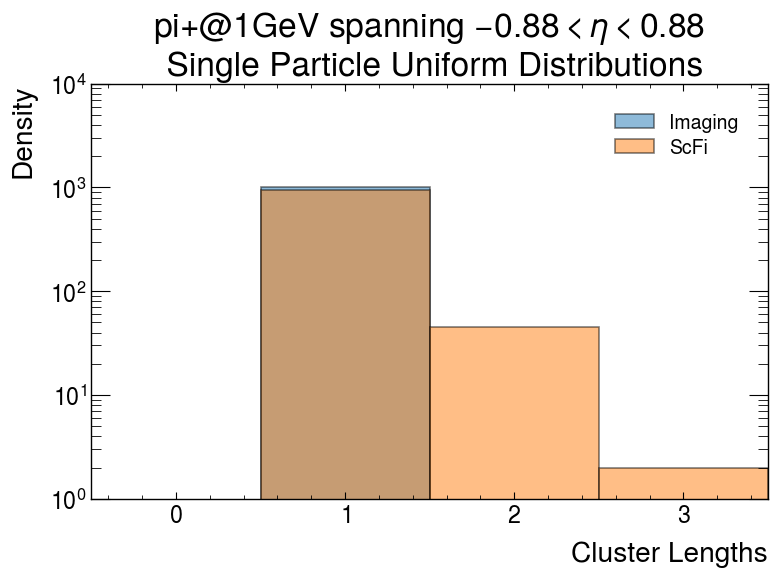

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/2GeV/45to135deg/pi+_2GeV_45to135deg.0001.root
7


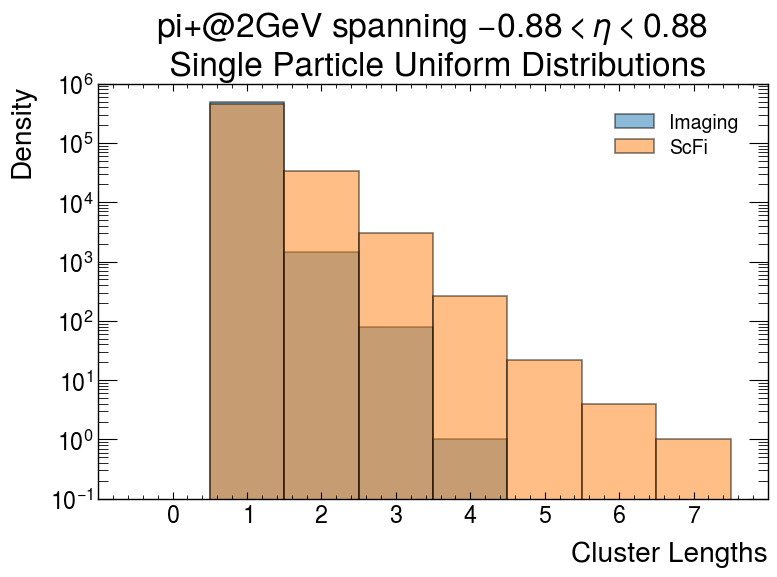

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/5GeV/45to135deg/pi+_5GeV_45to135deg.0001.root
7


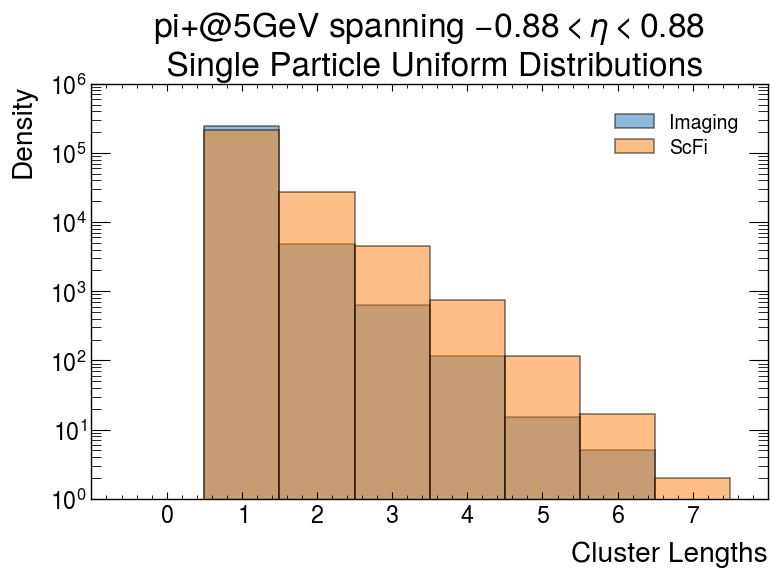

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/10GeV/45to135deg/pi+_10GeV_45to135deg.0001.root
9


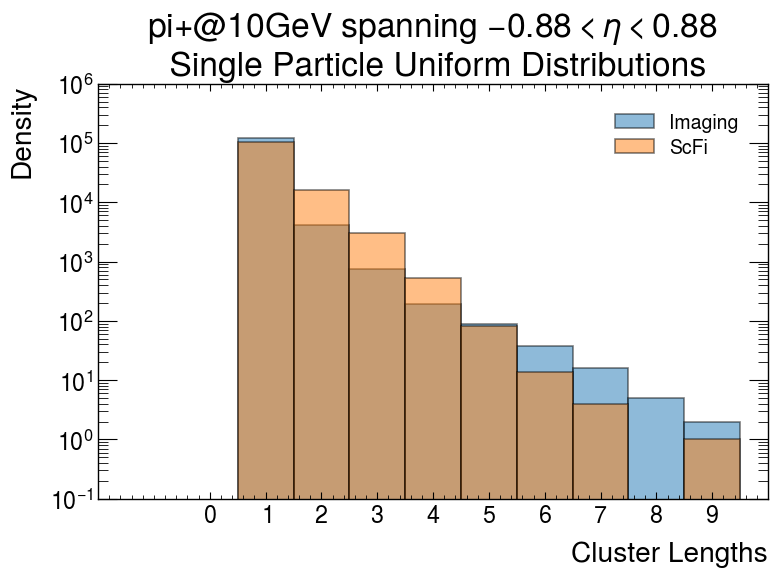

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi+/20GeV/45to135deg/pi+_20GeV_45to135deg.0001.root
7


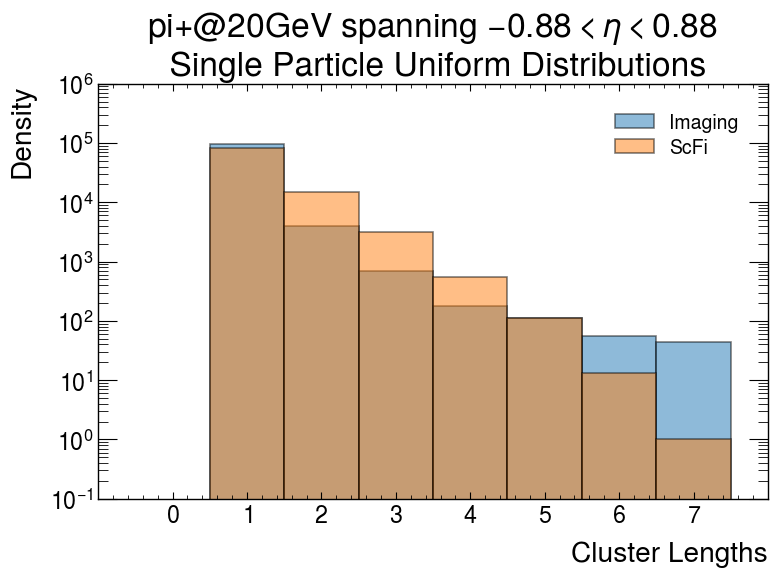

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/1GeV/45to135deg/pi0_1GeV_45to135deg.0001.root
4


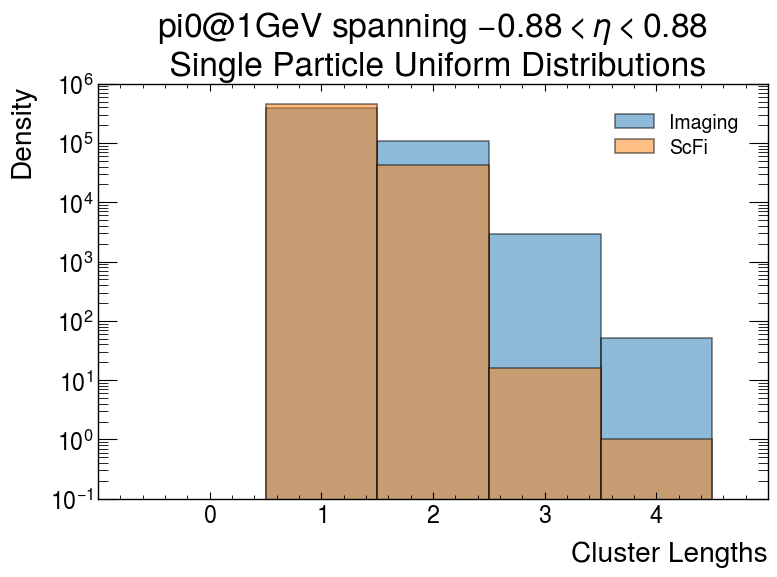

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/2GeV/45to135deg/pi0_2GeV_45to135deg.0001.root
3


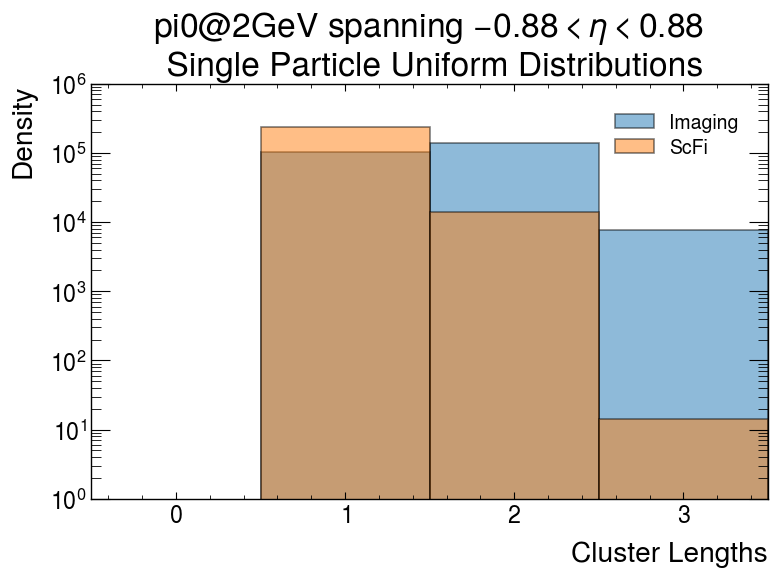

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/5GeV/45to135deg/pi0_5GeV_45to135deg.0001.root
4


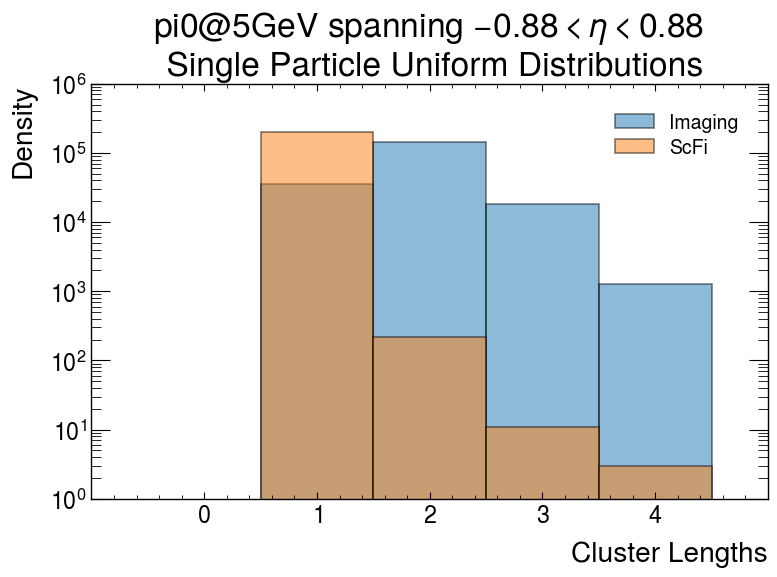

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/10GeV/45to135deg/pi0_10GeV_45to135deg.0001.root
4


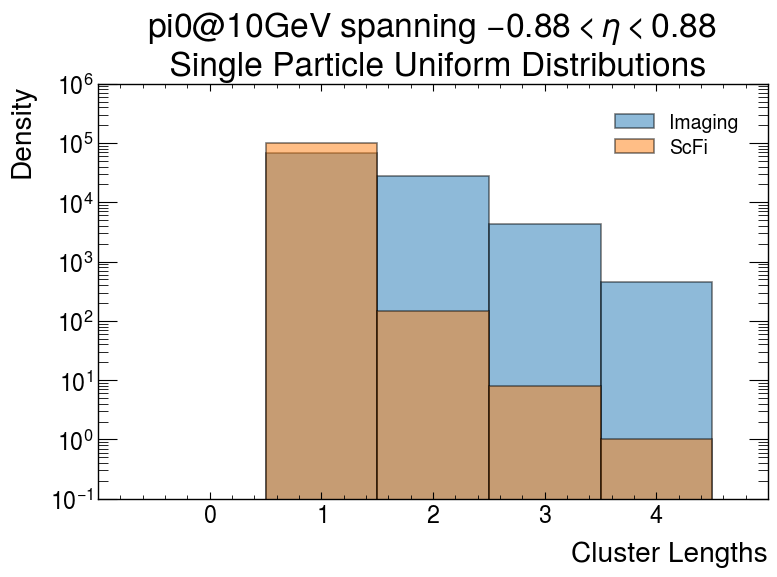

/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/slurm/RECO/master/SINGLE/pi0/20GeV/45to135deg/pi0_20GeV_45to135deg.0001.root
3


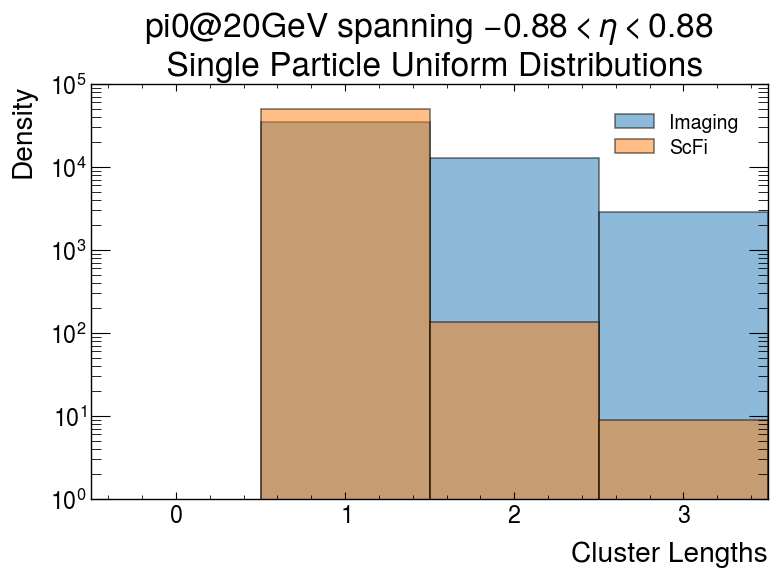

In [24]:
pp = PdfPages('ATHENA_FullSim_ClusterHists.pdf')  # save all plots to one single pdf.
eta_range = [-0.88, 0.88]

for j in range(len(recofiles)):
    for i in range(len(recofiles[j])):
        openreco = recofiles[j][i]
        print(openreco)
        recofile = uproot.open(openreco)
        recotree = recofile['events;1']

        particle_df = truth_df(recotree)
        eng = energies[j][i]
        rng = ranges[j][i]
                
        if "e-" in openreco:
            pp = clusterHists(particle_df, "e-", pp=pp, eta_range=eta_range, eng=eng)
        elif "gamma" in openreco:
            pp = clusterHists(particle_df, "gamma", pp=pp, eta_range=eta_range, eng=eng)
        elif "kaon0L" in openreco:
            pp = clusterHists(particle_df, "kaon0L", pp=pp, eta_range=eta_range, eng=eng)
        elif "neutron" in openreco:
            pp = clusterHists(particle_df, "neutron", pp=pp, eta_range=eta_range, eng=eng)
        elif "pi+" in openreco:
            pp = clusterHists(particle_df, "pi+", pp=pp, eta_range=eta_range, eng=eng)
        elif "pi0" in openreco:
            pp = clusterHists(particle_df, "pi0", pp=pp, eta_range=eta_range, eng=eng)
            
pp.close()

In [25]:
# eRes = [5.305, 3.764, 2.461, 1.821, 1.399]
# gRes = [5.320, 3.809, 2.541, 1.899, 1.447]
# p0Res = [7.404, 4.046, 2.530, 1.878, 1.447]
# ppRes = [24.043, 24.709, 20.952, 24.093, 35.368]
# kRes = [26.973, 27.485, 23.134, 25.304, 35.045]
# nRes = [32.468, 30.613, 29.885, 36.661, 40.457]
resses = [eRes, gRes, p0Res, ppRes, kRes, nRes]

for i in range(len(resses)):
    resses[i] = [j*100 for j in resses[i]]  # convert resolutions to percent

nrgs = [1, 2, 5, 10, 20]

def fitFunc(E, a, b):
    y = a+(b/np.sqrt(E))
    return y

a=0.234, b=5.041, unc1=0.037, unc2=0.060


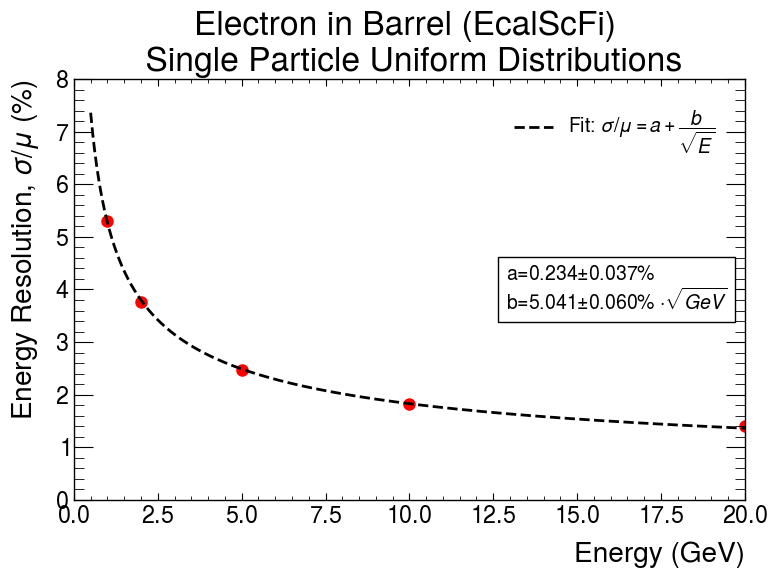

a=0.341, b=4.952, unc1=0.031, unc2=0.051


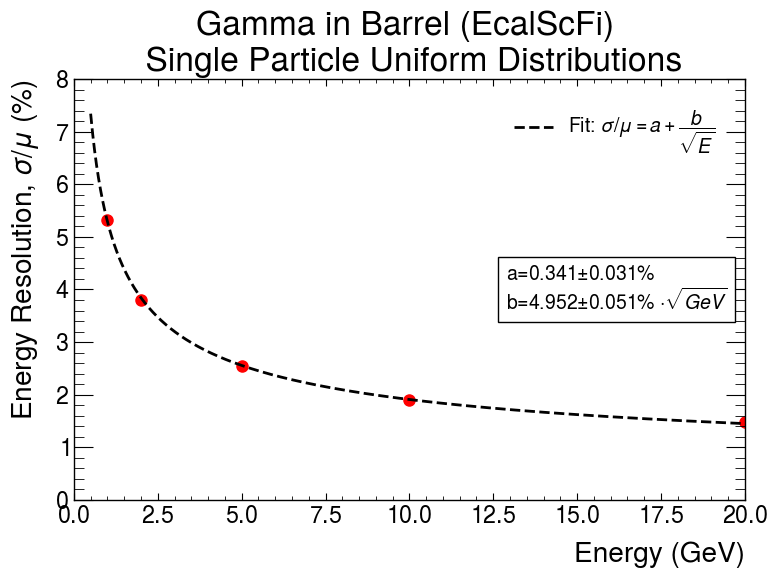

a=-0.583, b=7.505, unc1=0.523, unc2=0.859


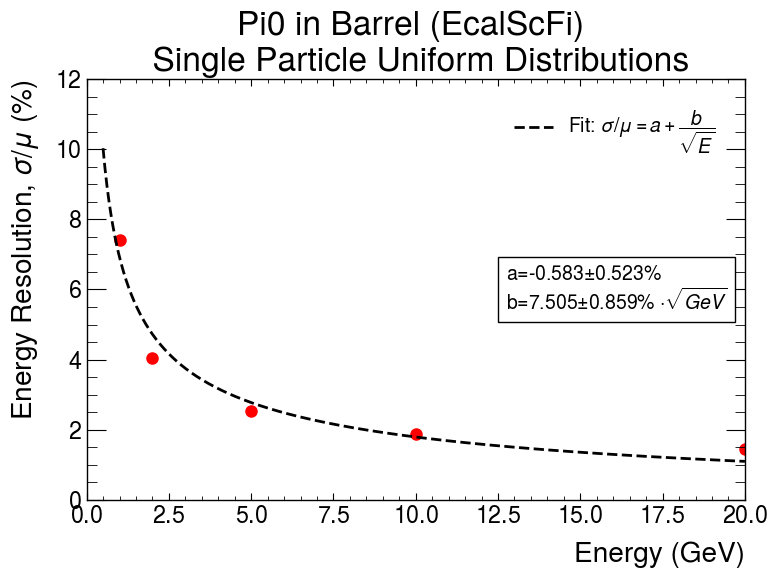

a=30.143, b=-7.998, unc1=5.473, unc2=8.998


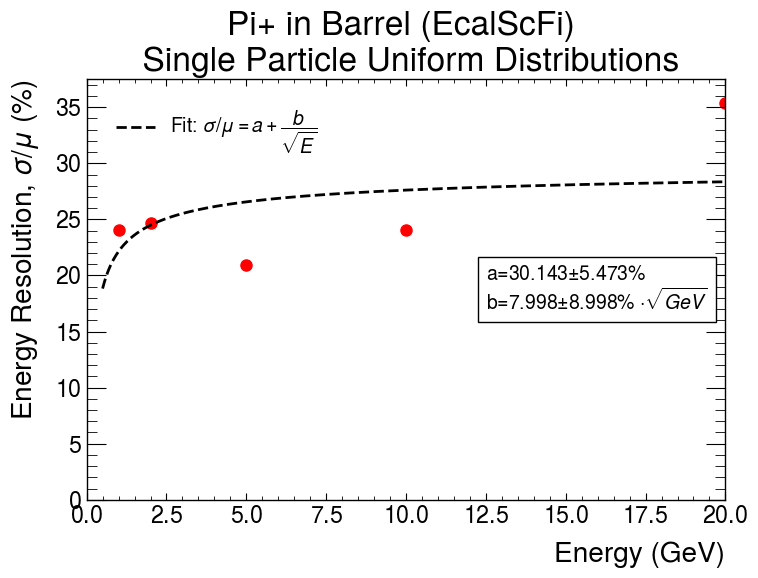

a=29.936, b=-4.356, unc1=4.771, unc2=7.843


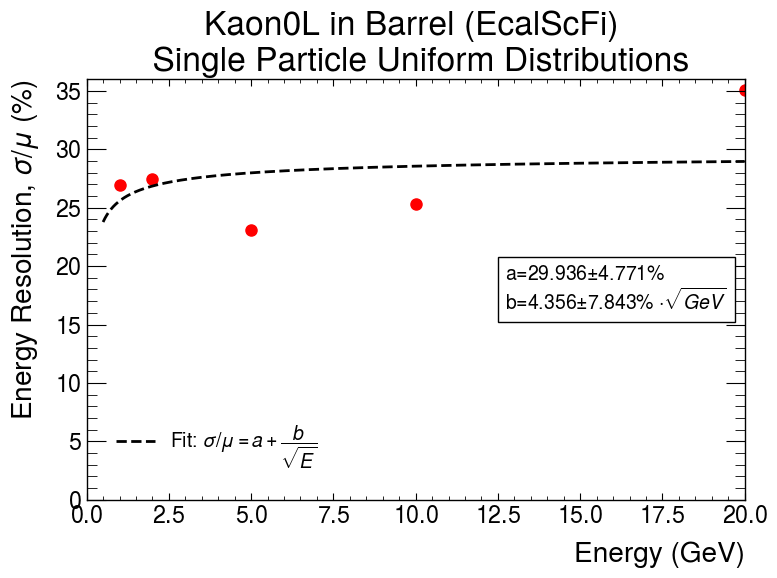

a=38.788, b=-8.855, unc1=3.867, unc2=6.357


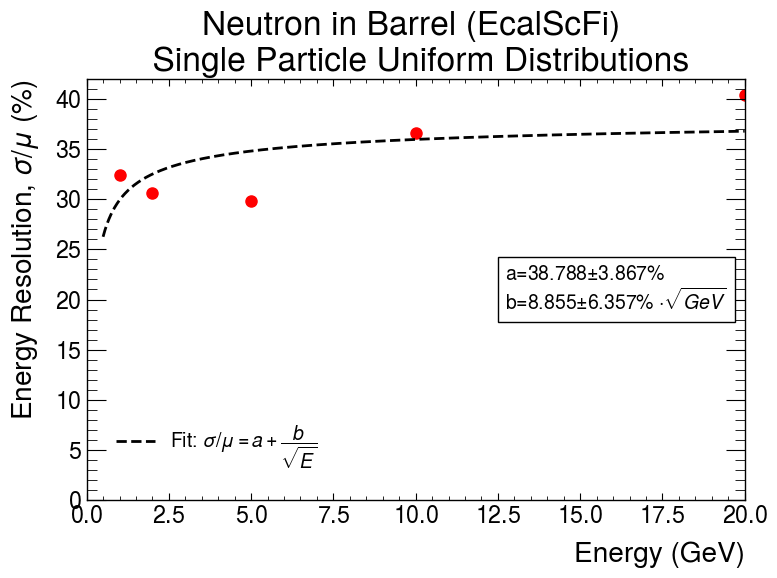

In [26]:
fitRes = [[], [], [], [], [], []]
names = ["Electron", "Gamma", "Pi0", "Pi+", "Kaon0L", "Neutron"]
for i in range(len(resses)):
    popt, pcov = curve_fit(fitFunc, nrgs, resses[i], maxfev = 100000000)
    unc = np.sqrt(np.diag(pcov))
    print("a={:.3f}, b={:.3f}, unc1={:.3f}, unc2={:.3f}".format(popt[0], popt[1],  unc[0], unc[1]))
    
    j = np.linspace(0.5, max(nrgs), 1000)
    model = fitFunc(j, *popt)
    fitRes[i].append(model)
    
    plt.figure()
    ax = plt.subplot(111)
    plt.plot(nrgs, resses[i], "ro")
    plt.plot(j, model, "k--", label="Fit: $\sigma/\mu = a + \dfrac{b}{\sqrt{E}}$")
    plt.xlabel("Energy (GeV)")
    plt.ylabel("Energy Resolution, $\sigma/\mu$ (%)")
    plt.title("{} in Barrel (EcalScFi) \n Single Particle Uniform Distributions".format(names[i]))
    plt.tight_layout()
    anchored_text = AnchoredText("a={:.3f}$\pm${:.3f}% \nb={:.3f}$\pm${:.3f}% $\cdot\sqrt{{GeV}}$".format(popt[0], unc[0], abs(popt[1]), unc[1]), loc="center right")
    ax.add_artist(anchored_text)
    plt.legend(loc="best")
    plt.gca().set_ylim(bottom=0)
    plt.show() 